In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

# 1)  Data Read & Info

In [2]:
#data = pd.read_csv("dataset_diabetes/diabetic_data.csv", na_values='?') we can convert'?' to 'NaN' in that way
#But we will handle missing values at the Missing Value Handling part so for now '?' can stay

data = pd.read_csv("dataset_diabetes/diabetic_data.csv")
diabetes = data.copy()
diabetes.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

In [3]:
#Data shape/size
#All rowsrepresents the individual patient so we have 101766
diabetes.shape

(101766, 50)

In [4]:
diabetes.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

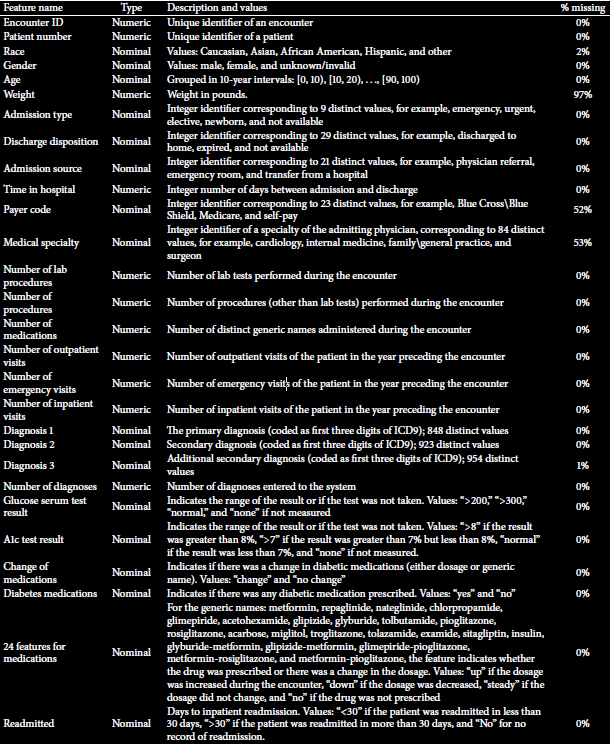

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
#Some statistical info about features
diabetes.describe(include="all")

encounter_id   patient_nbr       race  gender      age  weight  \
count   1.017660e+05  1.017660e+05     101766  101766   101766  101766   
unique           NaN           NaN          6       3       10      10   
top              NaN           NaN  Caucasian  Female  [70-80)       ?   
freq             NaN           NaN      76099   54708    26068   98569   
mean    1.652016e+08  5.433040e+07        NaN     NaN      NaN     NaN   
std     1.026403e+08  3.869636e+07        NaN     NaN      NaN     NaN   
min     1.252200e+04  1.350000e+02        NaN     NaN      NaN     NaN   
25%     8.496119e+07  2.341322e+07        NaN     NaN      NaN     NaN   
50%     1.523890e+08  4.550514e+07        NaN     NaN      NaN     NaN   
75%     2.302709e+08  8.754595e+07        NaN     NaN      NaN     NaN   
max     4.438672e+08  1.895026e+08        NaN     NaN      NaN     NaN   

        admission_type_id  discharge_disposition_id  admission_source_id  \
count       101766.000000             101766.000000        101766.000000   
unique                NaN                       NaN                  NaN   
top                   NaN                       NaN                  NaN   
freq                  NaN                       NaN                  NaN   
mean             2.024006                  3.715642             5.754437   
std              1.445403                  5.280166             4.064081   
min              1.000000                  1.000000             1.000000   
25%              1.000000                  1.000000             1.000000   
50%              1.000000                  1.000000             7.000000   
75%              3.000000                  4.000000             7.000000   
max              8.000000                 28.000000            25.000000   

        time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
count      101766.000000  ...      101766  101766               101766   
unique               NaN  ...           1       4                    4   
top                  NaN  ...          No      No                   No   
freq                 NaN  ...      101766   47383               101060   
mean            4.395987  ...         NaN     NaN                  NaN   
std             2.985108  ...         NaN     NaN                  NaN   
min             1.000000  ...         NaN     NaN                  NaN   
25%             2.000000  ...         NaN     NaN                  NaN   
50%             4.000000  ...         NaN     NaN                  NaN   
75%             6.000000  ...         NaN     NaN                  NaN   
max            14.000000  ...         NaN     NaN                  NaN   

        glipizide-metformin  glimepiride-pioglitazone  \
count                101766                    101766   
unique                    2                         2   
top                      No                        No   
freq                 101753                    101765   
mean                    NaN                       NaN   
std                     NaN                       NaN   
min                     NaN                       NaN   
25%                     NaN                       NaN   
50%                     NaN                       NaN   
75%                     NaN                       NaN   
max                     NaN                       NaN   

        metformin-rosiglitazone  metformin-pioglitazone  change diabetesMed  \
count                    101766                  101766  101766      101766   
unique                        2                       2       2           2   
top                          No                      No      No         Yes   
freq                     101764                  101765   54755       78363   
mean                        NaN                     NaN     NaN         NaN   
std                         NaN                     NaN     NaN         NaN   
min                         NaN                     NaN     NaN         NaN   


In [7]:
# Histogram of the target categories
def histogram(df,feature):
    ncount = len(df)
    ax = sns.countplot(x = feature, data=df ,palette="hls")
    sns.set(font_scale=1)
    ax.set_xlabel('Target Segments')
    plt.xticks(rotation=90)
    ax.set_ylabel('Number of Observations')
    fig = plt.gcf()
    fig.set_size_inches(12,5)
    # Make twin axis
    ax2=ax.twinx()
    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    # Use a LinearLocator to ensure the correct number of ticks
    #ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax.set_ylim(0,ncount)
    # And use a MultipleLocator to ensure a tick spacing of 10
    #ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)
    plt.title('Histogram of Binary Target Categories', fontsize=20, y=1.08)
    plt.show()
    plt.savefig('target_histogram.png')
    del ncount, x, y

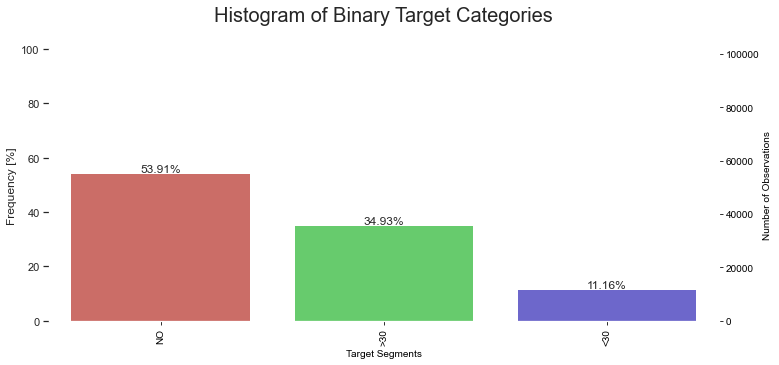

<Figure size 432x288 with 0 Axes>

In [8]:
histogram(diabetes,"readmitted") #We have to encode ><30 as Yes(1)

In [9]:
diabetes["readmitted"] = diabetes["readmitted"].replace(">30", 1)
diabetes["readmitted"] = diabetes["readmitted"].replace("<30", 1)
diabetes["readmitted"] = diabetes["readmitted"].replace("NO", 0)

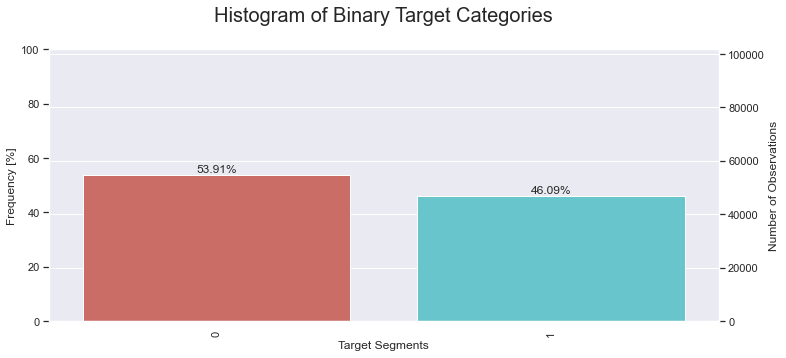

<Figure size 432x288 with 0 Axes>

In [10]:
histogram(diabetes,"readmitted")

* **Now we have more homogenious target variable that have no bias**

### Information about Missing Values and Data

In [11]:
def MissingUniqueStatistics(df):
  
    import io
    import pandas as pd
    import psutil, os, gc, time
    import seaborn as sns
    from IPython.display import display, HTML
    # pd.set_option('display.max_colwidth', -1)
    from io import BytesIO
    import base64

    print("MissingUniqueStatistics process has began:\n")
    proc = psutil.Process(os.getpid())
    gc.collect()
    mem_0 = proc.memory_info().rss
    start_time = time.time()

    variable_name_list = []
    total_entry_list = []
    data_type_list = []
    unique_values_list = []
    number_of_unique_values_list = []
    missing_value_number_list = []
    missing_value_ratio_list = []
    mean_list=[]
    std_list=[]
    min_list=[]
    Q1_list=[]
    Q2_list=[]
    Q3_list=[]
    max_list=[]

    df_statistics = df.describe().copy()

    for col in df.columns:
        variable_name_list.append(col)
        total_entry_list.append(df.loc[:,col].shape[0])
        data_type_list.append(df.loc[:,col].dtype)
        unique_values_list.append(list(df.loc[:,col].unique()))
        number_of_unique_values_list.append(len(list(df.loc[:,col].unique())))
        missing_value_number_list.append(df.loc[:,col].isna().sum())
        missing_value_ratio_list.append(round((100*df.loc[:,col].isna().sum()/df.loc[:,col].shape[0]),4))

        try:
            mean_list.append(df_statistics.loc[:,col][1])
            std_list.append(df_statistics.loc[:,col][2])
            min_list.append(df_statistics.loc[:,col][3])
            Q1_list.append(df_statistics.loc[:,col][4])
            Q2_list.append(df_statistics.loc[:,col][5])
            Q3_list.append(df_statistics.loc[:,col][6])
            max_list.append(df_statistics.loc[:,col][7])
        except:
            mean_list.append('NaN')
            std_list.append('NaN')
            min_list.append('NaN')
            Q1_list.append('NaN')
            Q2_list.append('NaN')
            Q3_list.append('NaN')
            max_list.append('NaN')

    data_info_df = pd.DataFrame({'Variable': variable_name_list, 
                               '#_Total_Entry':total_entry_list,
                               '#_Missing_Value': missing_value_number_list,
                               '%_Missing_Value':missing_value_ratio_list,
                               'Data_Type': data_type_list, 
                               'Unique_Values': unique_values_list,
                               '#_Unique_Values':number_of_unique_values_list,
                               'Mean':mean_list,
                               'STD':std_list,
                               'Min':min_list,
                               'Q1':Q1_list,
                               'Q2':Q2_list,
                               'Q3':Q3_list,
                               'Max':max_list
                               })

    data_info_df = data_info_df.set_index("Variable", inplace=False)

    print('MissingUniqueStatistics process has been completed!')
    print("--- in %s minutes ---" % ((time.time() - start_time)/60))

    return data_info_df.sort_values(by='%_Missing_Value', ascending=False)

In [12]:
data_info = MissingUniqueStatistics(diabetes)
data_info

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.012336047490437825 minutes ---


#_Total_Entry  #_Missing_Value  %_Missing_Value  \
Variable                                                                    
encounter_id                     101766                0              0.0   
troglitazone                     101766                0              0.0   
chlorpropamide                   101766                0              0.0   
glimepiride                      101766                0              0.0   
acetohexamide                    101766                0              0.0   
glipizide                        101766                0              0.0   
glyburide                        101766                0              0.0   
tolbutamide                      101766                0              0.0   
pioglitazone                     101766                0              0.0   
rosiglitazone                    101766                0              0.0   
acarbose                         101766                0              0.0   
miglitol                         101766                0              0.0   
tolazamide                       101766                0              0.0   
patient_nbr                      101766                0              0.0   
examide                          101766                0              0.0   
citoglipton                      101766                0              0.0   
insulin                          101766                0              0.0   
glyburide-metformin              101766                0              0.0   
glipizide-metformin              101766                0              0.0   
glimepiride-pioglitazone         101766                0              0.0   
metformin-rosiglitazone          101766                0              0.0   
metformin-pioglitazone           101766                0              0.0   
change                           101766                0              0.0   
diabetesMed                      101766                0              0.0   
nateglinide                      101766                0              0.0   
repaglinide                      101766                0              0.0   
metformin                        101766                0              0.0   
A1Cresult                        101766                0              0.0   
race                             101766                0              0.0   
gender                           101766                0              0.0   
age                              101766                0              0.0   
weight                           101766                0              0.0   
admission_type_id                101766                0              0.0   
discharge_disposition_id         101766                0              0.0   
admission_source_id              101766                0              0.0   
time_in_hospital                 101766                0              0.0   
payer_code                       101766                0              0.0   
medical_specialty                101766                0              0.0   
num_lab_procedures               101766                0              0.0   
num_procedures                   101766                0              0.0   
num_medications                  101766                0              0.0   
number_outpatient                101766                0              0.0   
number_emergency                 101766                0              0.0   
number_inpatient                 101766                0              0.0   
diag_1                           101766                0              0.0   
diag_2                           101766                0              0.0   
diag_3                           101766                0              0.0   
number_diagnoses                 101766                0              0.0   
max_glu_serum                    101766                0              0.0   
readmitted                       101766                0              0.0   

                     

**Here we have numerical columns but they represented in string format. And missing values represented by "?" so we have to change these strings with the proper representetions**

In [13]:
for col in diabetes.columns:
    if diabetes[col].dtype == object:
         print(col,diabetes[col][diabetes[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0


In [14]:
#Replacing the "?" sign with np.nan 

diabetes.replace('?', np.nan, inplace=True)
diabetes.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)    NaN   
1        149190     55629189        Caucasian  Female  [10-20)    NaN   
2         64410     86047875  AfricanAmerican  Female  [20-30)    NaN   
3        500364     82442376        Caucasian    Male  [30-40)    NaN   
4         16680     42519267        Caucasian    Male  [40-50)    NaN   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No          0  
1                      No      Ch         Yes          1  
2                      No      No         Yes          0  
3                      No      Ch         Yes          0  
4                      No      Ch         Yes          0  

[5 rows x 50 columns]

In [15]:
diabetes.gender.replace('Unknown/Invalid', np.nan, inplace=True)

* **Again we can run the MissingValueStatistics Function to see real missing rates of feastures**

In [16]:
data_info = MissingUniqueStatistics(diabetes)
data_info

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.013948782285054525 minutes ---


#_Total_Entry  #_Missing_Value  %_Missing_Value  \
Variable                                                                    
weight                           101766            98569          96.8585   
medical_specialty                101766            49949          49.0822   
payer_code                       101766            40256          39.5574   
race                             101766             2273           2.2336   
diag_3                           101766             1423           1.3983   
diag_2                           101766              358           0.3518   
diag_1                           101766               21           0.0206   
gender                           101766                3           0.0029   
troglitazone                     101766                0           0.0000   
miglitol                         101766                0           0.0000   
encounter_id                     101766                0           0.0000   
acarbose                         101766                0           0.0000   
tolazamide                       101766                0           0.0000   
pioglitazone                     101766                0           0.0000   
tolbutamide                      101766                0           0.0000   
glyburide                        101766                0           0.0000   
rosiglitazone                    101766                0           0.0000   
insulin                          101766                0           0.0000   
examide                          101766                0           0.0000   
citoglipton                      101766                0           0.0000   
acetohexamide                    101766                0           0.0000   
glyburide-metformin              101766                0           0.0000   
glipizide-metformin              101766                0           0.0000   
glimepiride-pioglitazone         101766                0           0.0000   
metformin-rosiglitazone          101766                0           0.0000   
metformin-pioglitazone           101766                0           0.0000   
change                           101766                0           0.0000   
diabetesMed                      101766                0           0.0000   
glipizide                        101766                0           0.0000   
repaglinide                      101766                0           0.0000   
glimepiride                      101766                0           0.0000   
chlorpropamide                   101766                0           0.0000   
age                              101766                0           0.0000   
admission_type_id                101766                0           0.0000   
discharge_disposition_id         101766                0           0.0000   
admission_source_id              101766                0           0.0000   
time_in_hospital                 101766                0           0.0000   
num_lab_procedures               101766                0           0.0000   
num_procedures                   101766                0           0.0000   
num_medications                  101766                0           0.0000   
number_outpatient                101766                0           0.0000   
number_emergency                 101766                0           0.0000   
number_inpatient                 101766                0           0.0000   
number_diagnoses                 101766                0           0.0000   
max_glu_serum                    101766                0           0.0000   
A1Cresult                        101766                0           0.0000   
metformin                        101766                0           0.0000   
patient_nbr                      101766                0           0.0000   
nateglinide                      101766                0           0.0000   
readmitted                       101766                0           0.0000   

                     

### Showing the correlation map of the dataset

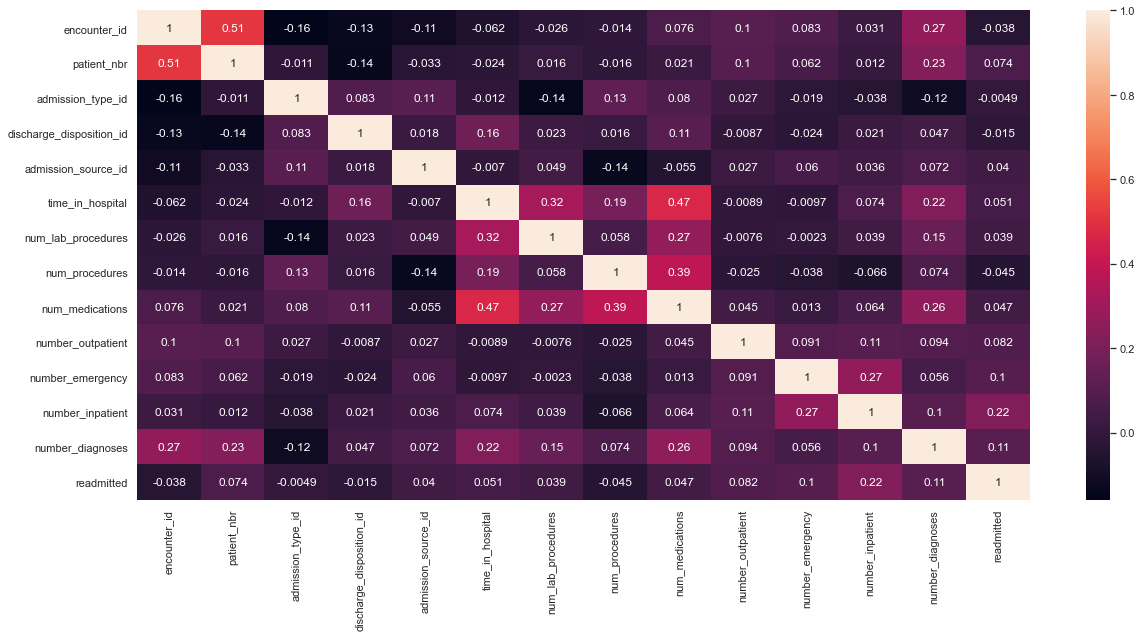

In [17]:
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(diabetes.corr(), annot=True)
plt.show()

**All features we can see on heatmap, have no significant correlation between each other**

###  Missing Value Graphs

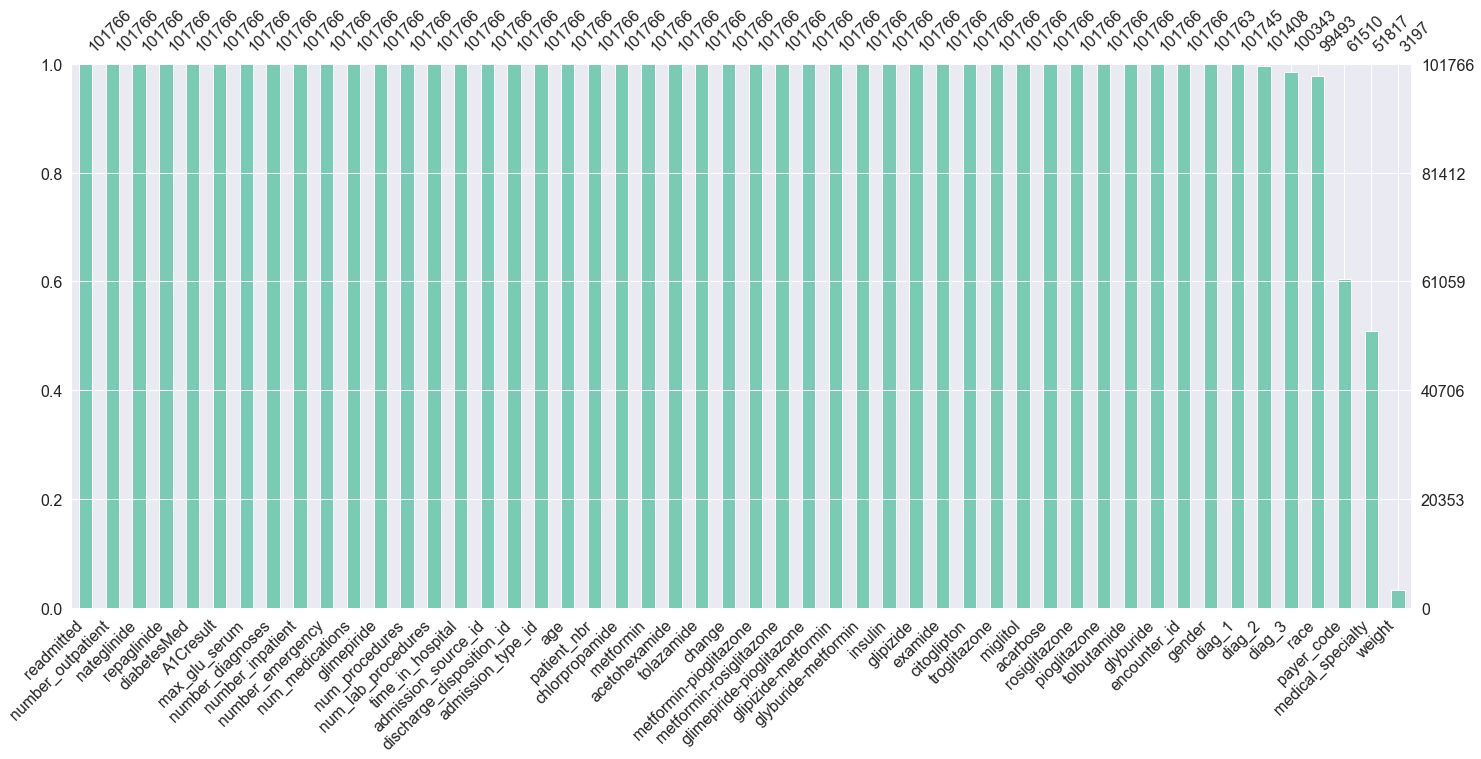

In [18]:
msno.bar(diabetes,color='#79ccb3',sort='descending')
plt.show()

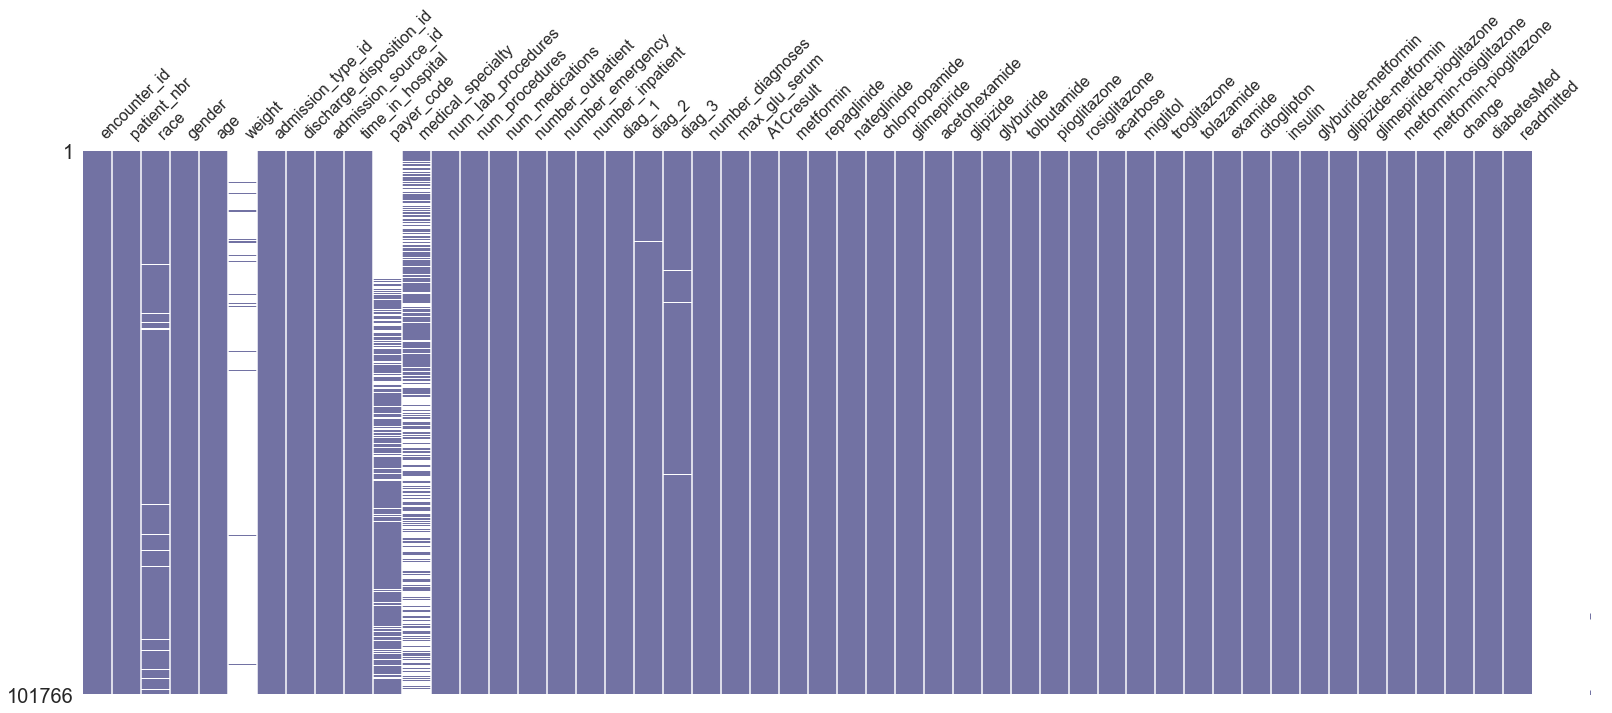

In [19]:
msno.matrix(diabetes,color=(0.45,0.45,0.64),figsize=(27, 10), width_ratios=(10, 0))
plt.show()

There were several features that could not be treated directly since they had a high percentage of missing values. **These features were weight (97% values missing), payer code (40%), and medical specialty (47%).** Weight attribute was considered to be too sparse and it was not included in further analysis. Payer code & Medical specialty was removed since it was not considered relevant to the outcome.

In [20]:
# 1- Row Uniqueness (Drop Duplicates) 
len(data_info.index) == data_info.shape[0]

True

In [21]:
# 2- Column Uniqueness (Drop Singletons)
numerical_columns = list(data_info.loc[(data_info.loc[:,"Data_Type"]=="int64") |
                                       (data_info.loc[:,"Data_Type"]=="float64")].index)
print(f'number of numerical Columns : {len(numerical_columns)}\n', numerical_columns)

number of numerical Columns : 14
 ['encounter_id', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'patient_nbr', 'readmitted']


In [22]:
categorical_columns = list(data_info.loc[(data_info.loc[:,"Data_Type"]=="object") |
                                       (data_info.loc[:,"Data_Type"]=="object")].index)
print(f'number of numerical Columns : {len(categorical_columns)}\n', categorical_columns)

number of numerical Columns : 36
 ['weight', 'medical_specialty', 'payer_code', 'race', 'diag_3', 'diag_2', 'diag_1', 'gender', 'troglitazone', 'miglitol', 'acarbose', 'tolazamide', 'pioglitazone', 'tolbutamide', 'glyburide', 'rosiglitazone', 'insulin', 'examide', 'citoglipton', 'acetohexamide', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'glipizide', 'repaglinide', 'glimepiride', 'chlorpropamide', 'age', 'max_glu_serum', 'A1Cresult', 'metformin', 'nateglinide']


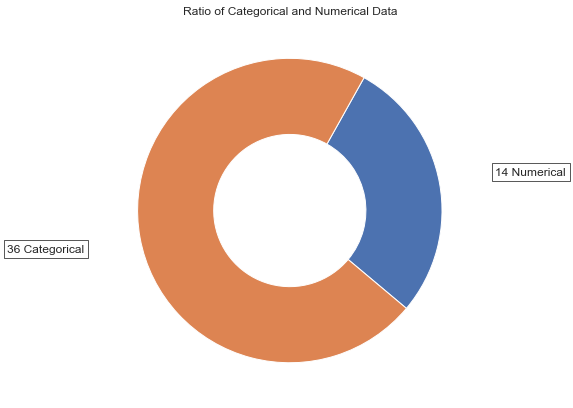

In [23]:
# We Found How Many Categorical And Numerical Columns Are
nb_numerical_columns   = len(numerical_columns)
nb_categorical_columns = len(categorical_columns)

# Visualize
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))

recipe = [str(nb_numerical_columns)+' Numerical',
          str(nb_categorical_columns)+' Categorical']

data = [nb_numerical_columns, nb_categorical_columns]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Ratio of Categorical and Numerical Data")

plt.show()

In [24]:
def ZeroVarianceFinder(df, numerical_columns):

    zerovariance_numerical_features=[]
    for col in numerical_columns:
        try:
            if pd.DataFrame(df[col]).describe().loc['std'][0] == 0.00 or \
            np.isnan(pd.DataFrame(df[col]).describe().loc['std'][0]):
                zerovariance_numerical_features.append(col)
        except:
            print("Error:",col)
    return zerovariance_numerical_features

In [25]:
zerovariance_numerical_features = ZeroVarianceFinder(diabetes,numerical_columns)
zerovariance_numerical_features

[]

In [26]:
singleton_categorical_features=[]
for col in categorical_columns:
    if len(diabetes[col].unique()) <= 1:
        singleton_categorical_features.append(col)
len(singleton_categorical_features), singleton_categorical_features

(2, ['examide', 'citoglipton'])

In [27]:
diabetes = diabetes.drop(['citoglipton', 'examide'], axis = 1)

In [28]:
diag_cols = ['diag_1','diag_2','diag_3']

for col in diag_cols:
    diabetes[col] = diabetes[col].astype(str).str.replace('E','-')
    diabetes[col] = diabetes[col].astype(str).str.replace('V','-')
    condition = diabetes[col].astype(str).str.contains('250')
    diabetes.loc[condition,col] = '250'

diabetes[diag_cols] = diabetes[diag_cols].astype(float)

# diagnosis grouping
for col in diag_cols:
    diabetes['temp']=np.nan
    
    condition = diabetes[col]==250
    diabetes.loc[condition,'temp']='Diabetes'
    
    condition = (diabetes[col]>=390) & (diabetes[col]<=458) | (diabetes[col]==785)
    diabetes.loc[condition,'temp']='Circulatory'
    
    condition = (diabetes[col]>=460) & (diabetes[col]<=519) | (diabetes[col]==786)
    diabetes.loc[condition,'temp']='Respiratory'
    
    condition = (diabetes[col]>=520) & (diabetes[col]<=579) | (diabetes[col]==787)
    diabetes.loc[condition,'temp']='Digestive'
    
    condition = (diabetes[col]>=580) & (diabetes[col]<=629) | (diabetes[col]==788)
    diabetes.loc[condition,'temp']='Genitourinary'
    
    condition = (diabetes[col]>=800) & (diabetes[col]<=999)
    diabetes.loc[condition,'temp']='Injury'
    
    condition = (diabetes[col]>=710) & (diabetes[col]<=739)
    diabetes.loc[condition,'temp']='Muscoloskeletal'
    
    condition = (diabetes[col]>=140) & (diabetes[col]<=239)
    diabetes.loc[condition,'temp']='Neoplasms'
    
    condition = diabetes[col]==0
    diabetes.loc[condition,col]='?'
    diabetes['temp']=diabetes['temp'].fillna('Others')
    condition = diabetes['temp']=='0'
    diabetes.loc[condition,'temp']=np.nan
    diabetes[col]=diabetes['temp']
    diabetes.drop('temp',axis=1,inplace=True)

    

In [29]:
diabetes[diag_cols].head()

diag_1     diag_2       diag_3
0   Diabetes     Others       Others
1     Others   Diabetes       Others
2     Others   Diabetes       Others
3     Others   Diabetes  Circulatory
4  Neoplasms  Neoplasms     Diabetes

In [30]:
data_info = MissingUniqueStatistics(diabetes)
data_info

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.012442568937937418 minutes ---


#_Total_Entry  #_Missing_Value  %_Missing_Value  \
Variable                                                                    
weight                           101766            98569          96.8585   
medical_specialty                101766            49949          49.0822   
payer_code                       101766            40256          39.5574   
race                             101766             2273           2.2336   
gender                           101766                3           0.0029   
encounter_id                     101766                0           0.0000   
troglitazone                     101766                0           0.0000   
acetohexamide                    101766                0           0.0000   
glipizide                        101766                0           0.0000   
glyburide                        101766                0           0.0000   
tolbutamide                      101766                0           0.0000   
pioglitazone                     101766                0           0.0000   
rosiglitazone                    101766                0           0.0000   
acarbose                         101766                0           0.0000   
miglitol                         101766                0           0.0000   
glyburide-metformin              101766                0           0.0000   
tolazamide                       101766                0           0.0000   
insulin                          101766                0           0.0000   
chlorpropamide                   101766                0           0.0000   
glipizide-metformin              101766                0           0.0000   
glimepiride-pioglitazone         101766                0           0.0000   
metformin-rosiglitazone          101766                0           0.0000   
metformin-pioglitazone           101766                0           0.0000   
change                           101766                0           0.0000   
diabetesMed                      101766                0           0.0000   
glimepiride                      101766                0           0.0000   
metformin                        101766                0           0.0000   
nateglinide                      101766                0           0.0000   
number_outpatient                101766                0           0.0000   
age                              101766                0           0.0000   
admission_type_id                101766                0           0.0000   
discharge_disposition_id         101766                0           0.0000   
admission_source_id              101766                0           0.0000   
time_in_hospital                 101766                0           0.0000   
num_lab_procedures               101766                0           0.0000   
num_procedures                   101766                0           0.0000   
num_medications                  101766                0           0.0000   
number_emergency                 101766                0           0.0000   
repaglinide                      101766                0           0.0000   
number_inpatient                 101766                0           0.0000   
diag_1                           101766                0           0.0000   
diag_2                           101766                0           0.0000   
diag_3                           101766                0           0.0000   
number_diagnoses                 101766                0           0.0000   
max_glu_serum                    101766                0           0.0000   
A1Cresult                        101766                0           0.0000   
patient_nbr                      101766                0           0.0000   
readmitted                       101766                0           0.0000   

                         Data_Type  \
Variable                             
weight                      object   
medical_specialty           object   
payer_code             

* **Numerical Columns Update**

In [31]:
numerical_columns = list(data_info.loc[(data_info.loc[:,"Data_Type"]=="int64") |
                                       (data_info.loc[:,"Data_Type"]=="float64")].index)
print(f'number of numerical Columns : {len(numerical_columns)}\n', numerical_columns)

number of numerical Columns : 14
 ['encounter_id', 'number_outpatient', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'patient_nbr', 'readmitted']


* **Categorical Columns Update**

In [32]:
categorical_columns = list(data_info.loc[(data_info.loc[:,"Data_Type"]=="object") |
                                       (data_info.loc[:,"Data_Type"]=="object")].index)
print(f'number of numerical Columns : {len(categorical_columns)}\n', categorical_columns)

number of numerical Columns : 34
 ['weight', 'medical_specialty', 'payer_code', 'race', 'gender', 'troglitazone', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'glyburide-metformin', 'tolazamide', 'insulin', 'chlorpropamide', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'glimepiride', 'metformin', 'nateglinide', 'age', 'repaglinide', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult']


# 2)Train/Test/Validation Split

<img src="https://drive.google.com/uc?id=1NWFzWmnzGhcDODfnVlM1UstaLKx8JKT_" width=700>

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = diabetes.loc[:, diabetes.columns != 'readmitted']
y = diabetes.readmitted
X.shape, y.shape

((101766, 47), (101766,))

In [35]:
def train_val_test_split(X, y, train_size, val_size, test_size, random_state=0):
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = test_size, random_state=random_state)
    
    relative_train_size = train_size / (val_size + train_size) #  = 0.6/0.8
    
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                      train_size = relative_train_size, 
                                                      test_size = 1-relative_train_size)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [36]:
train_size = 0.6
val_size = 0.2
test_size = 0.2

In [37]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, train_size, val_size, test_size)
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(61058, 47) (20354, 47) (20354, 47) (61058,) (20354,) (20354,)


* **Histogram of Binary Target Categories for Train**

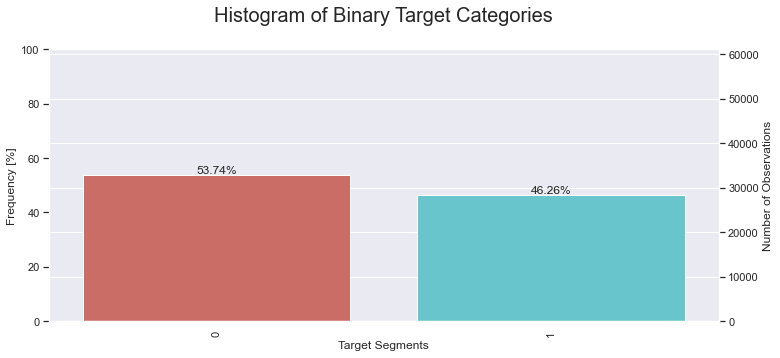

<Figure size 432x288 with 0 Axes>

In [38]:
histogram(X_train,y_train)

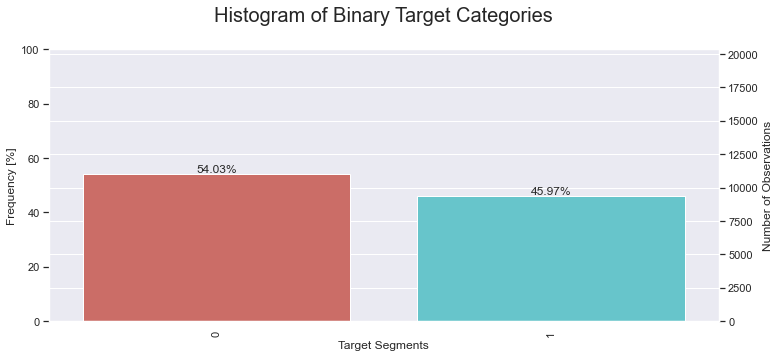

<Figure size 432x288 with 0 Axes>

In [39]:
histogram(X_test,y_test)

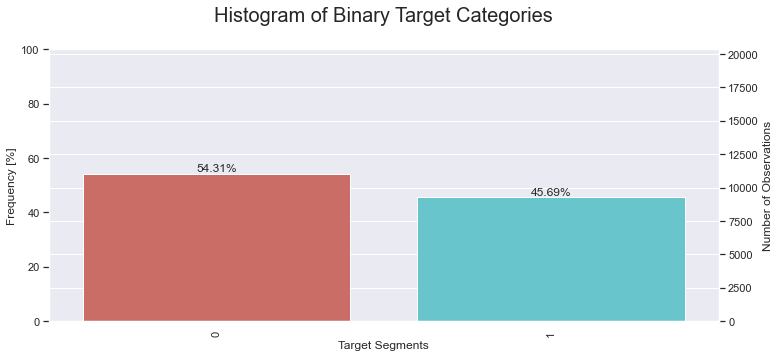

<Figure size 432x288 with 0 Axes>

In [40]:
histogram(X_val,y_val)

* **Visualization Before Cleaning Outlier**

In [41]:
numerical_columns.remove('readmitted')

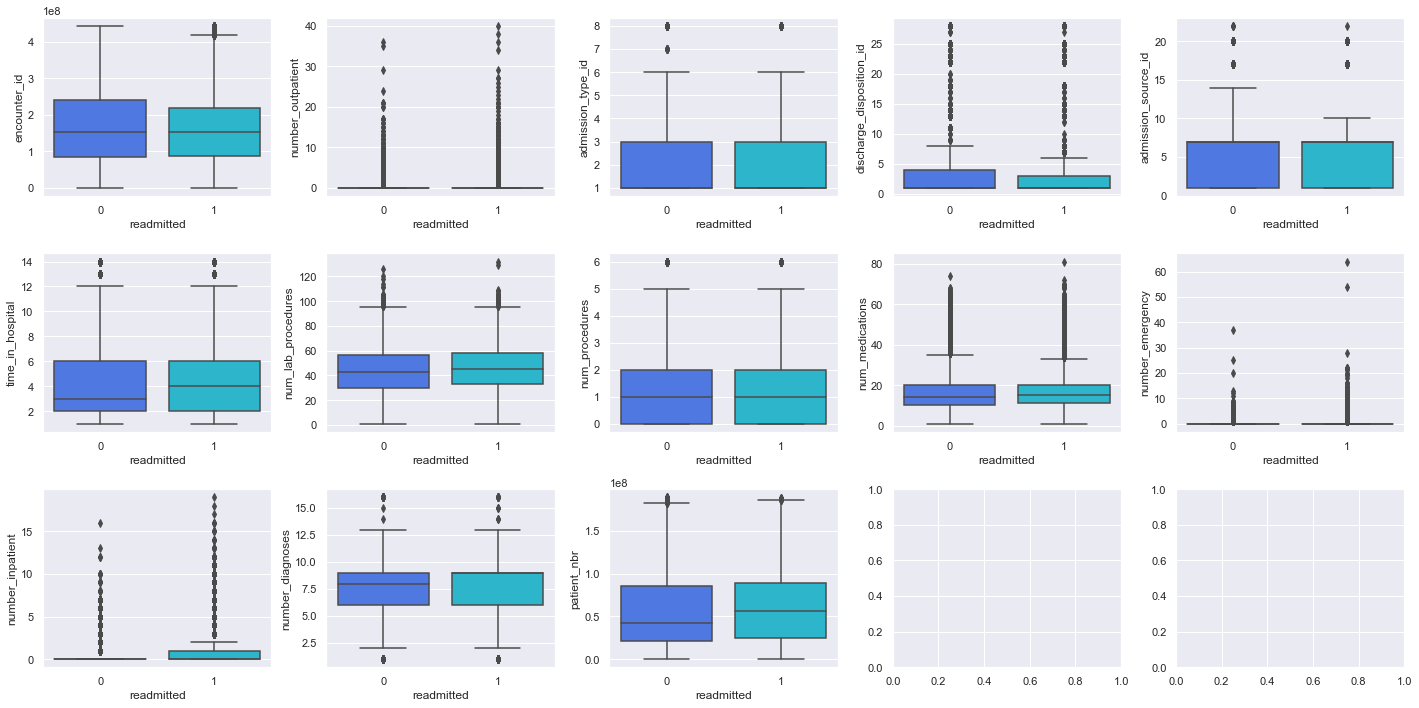

In [42]:
from pylab import rcParams

def box_plot(x,y,data):

    rcParams['figure.figsize'] = 20, 10
    fig, axs = plt.subplots(3,5)
    plt.tight_layout()
    fig.subplots_adjust(top=0.7)
    sns.set(style="ticks", palette="rainbow")

    j = 0
    k = 0
    
    for i in range(len(y)):
        sns.boxplot(x=x, y=y[i], data=data,ax=axs[j,k])
        if(k==4):
            k = 0
            j += 1
        else:
            k += 1

    plt.tight_layout()
    plt.show()

box_plot(y_train,numerical_columns,X_train)

### Cleaning Outliers

* **For Train Set**

In [43]:
def hard_edge_reduction(df, numerical_columns):
    print("Outlier Handling process has begun...\n")
    df_outlier_cleaned = df.copy()
    outlier_boundries_dict = {}
    for col in numerical_columns:
        try:
            print(f"-----{col}------")
            lower_limit = df[col].quantile(q=0.01)
            upper_limit = df[col].quantile(q=0.99)

            number_of_outliers = len(df[(df[col] < lower_limit) | (df[col] > upper_limit)])
            if number_of_outliers>0:
                print(f"{number_of_outliers} outliers are found for {col}. \n")

            #outlier_boundries_dict[col] = (lower_limit,upper_limit)
            outlier_boundries_dict.update({col:(lower_limit,upper_limit)})

            df_outlier_cleaned.loc[df[col]<lower_limit, col] = lower_limit
            df_outlier_cleaned.loc[df[col]>upper_limit, col] = upper_limit              

        except:
            print(f"Outlier handling failed for {col}.\n")
    
    print("Outlier Handling process has ended...")
    return df_outlier_cleaned, outlier_boundries_dict

In [44]:
X_train_outlier_cleaned, outlier_boundries_dict = hard_edge_reduction(X_train,numerical_columns)

Outlier Handling process has begun...

-----encounter_id------
1222 outliers are found for encounter_id. 

-----number_outpatient------
547 outliers are found for number_outpatient. 

-----admission_type_id------
204 outliers are found for admission_type_id. 

-----discharge_disposition_id------
85 outliers are found for discharge_disposition_id. 

-----admission_source_id------
102 outliers are found for admission_source_id. 

-----time_in_hospital------
-----num_lab_procedures------
532 outliers are found for num_lab_procedures. 

-----num_procedures------
-----num_medications------
1042 outliers are found for num_medications. 

-----number_emergency------
551 outliers are found for number_emergency. 

-----number_inpatient------
434 outliers are found for number_inpatient. 

-----number_diagnoses------
198 outliers are found for number_diagnoses. 

-----patient_nbr------
1221 outliers are found for patient_nbr. 

Outlier Handling process has ended...


In [45]:
outlier_boundries_dict

{'encounter_id': (7818045.000000001, 430789305.02),
 'number_outpatient': (0.0, 5.0),
 'admission_type_id': (1.0, 6.0),
 'discharge_disposition_id': (1.0, 25.0),
 'admission_source_id': (1.0, 17.0),
 'time_in_hospital': (1.0, 14.0),
 'num_lab_procedures': (1.0, 85.0),
 'num_procedures': (0.0, 6.0),
 'num_medications': (3.0, 43.0),
 'number_emergency': (0.0, 3.0),
 'number_inpatient': (0.0, 6.0),
 'number_diagnoses': (2.0, 9.0),
 'patient_nbr': (242757.0, 160995147.26000002)}

* **For Test Set**

In [46]:
X_test_outlier_cleaned = X_test.copy()
for col in numerical_columns:
    lower_limit = outlier_boundries_dict[col][0]
    upper_limit = outlier_boundries_dict[col][1]
    number_of_outliers = len(X_test[(X_test[col] < lower_limit) | (X_test[col] > upper_limit)])
    
    if number_of_outliers>0:
                print(f"{number_of_outliers} outliers are found for {col}. \n")
    
    X_test_outlier_cleaned.loc[X_test[col]<lower_limit, col] = lower_limit
    X_test_outlier_cleaned.loc[X_test[col]>upper_limit, col] = upper_limit

420 outliers are found for encounter_id. 

197 outliers are found for number_outpatient. 

67 outliers are found for admission_type_id. 

27 outliers are found for discharge_disposition_id. 

36 outliers are found for admission_source_id. 

178 outliers are found for num_lab_procedures. 

323 outliers are found for num_medications. 

186 outliers are found for number_emergency. 

143 outliers are found for number_inpatient. 

73 outliers are found for number_diagnoses. 

400 outliers are found for patient_nbr. 



* **For Validation Set**

In [47]:
X_val_outlier_cleaned = X_val.copy()
for col in numerical_columns:
    lower_limit = outlier_boundries_dict[col][0]
    upper_limit = outlier_boundries_dict[col][1]
    number_of_outliers = len(X_val[(X_val[col] < lower_limit) | (X_val[col] > upper_limit)])
    
    if number_of_outliers>0:
        print(f"{number_of_outliers} outliers are found for {col}. \n")
    
    X_val_outlier_cleaned.loc[X_val[col]<lower_limit, col] = lower_limit
    X_val_outlier_cleaned.loc[X_val[col]>upper_limit, col] = upper_limit

387 outliers are found for encounter_id. 

180 outliers are found for number_outpatient. 

70 outliers are found for admission_type_id. 

32 outliers are found for discharge_disposition_id. 

37 outliers are found for admission_source_id. 

176 outliers are found for num_lab_procedures. 

327 outliers are found for num_medications. 

202 outliers are found for number_emergency. 

147 outliers are found for number_inpatient. 

63 outliers are found for number_diagnoses. 

369 outliers are found for patient_nbr. 



* **Visualization After Cleaning Outlier**

In [48]:
X_train = X_train_outlier_cleaned 
X_test = X_test_outlier_cleaned 
X_val = X_val_outlier_cleaned 

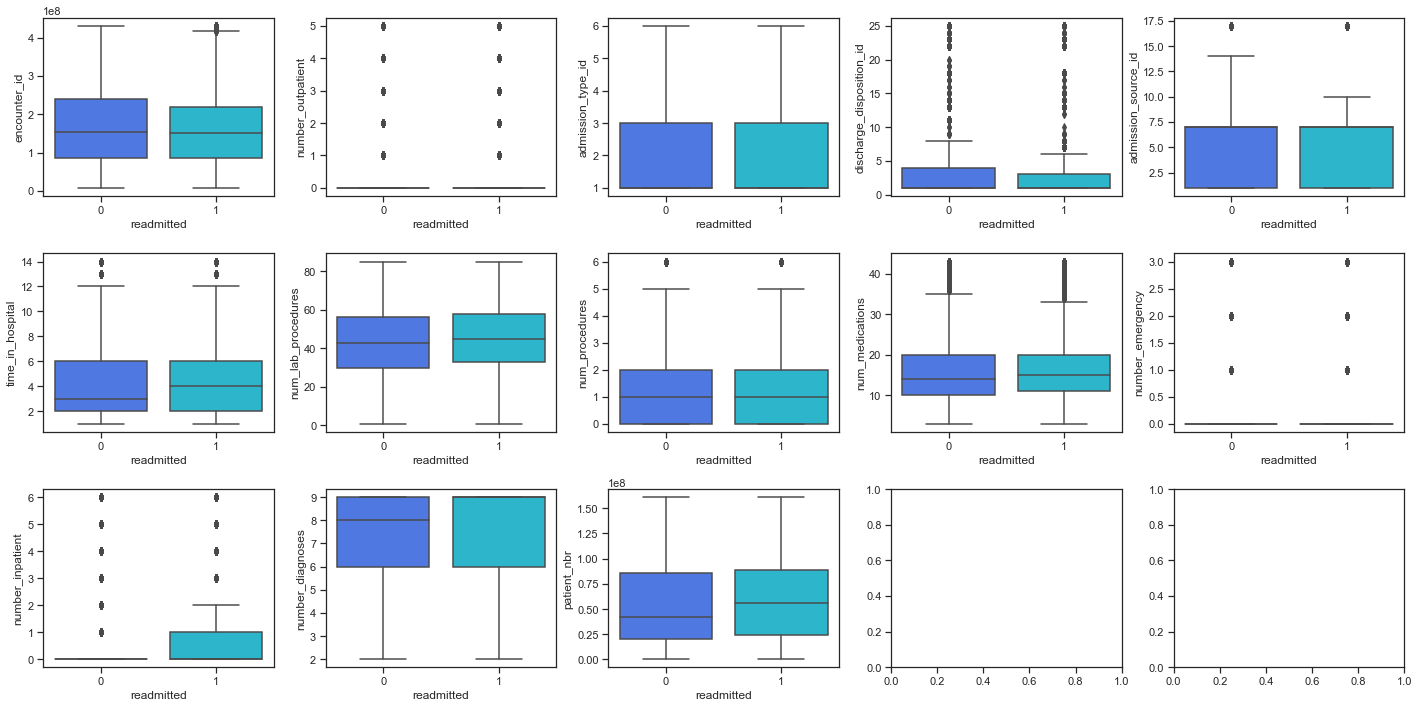

In [49]:
box_plot(y_train,numerical_columns,X_train)

* **Re-encoding admission type, discharge type and admission source into fewer categories**

In [50]:
# re-encoding admission type, discharge type and admission source into fewer categories
def ReencodingIDs(df):

    # Not Mapped, Unknown/Invalid, NULL and Not Available replaced with "np.nan"
    df['admission_type_id'] = df['admission_type_id'].replace(2,1)
    df['admission_type_id'] = df['admission_type_id'].replace(7,1)
    df['admission_type_id'] = df['admission_type_id'].replace(5,np.nan)
    df['admission_type_id'] = df['admission_type_id'].replace(6,np.nan)
    df['admission_type_id'] = df['admission_type_id'].replace(8,np.nan)

    # Not Mapped, Unknown/Invalid, NULL and Not Available replaced with "np.nan"
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(27,2)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(28,2)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(29,2)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(30,2)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,10)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(19,11)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(20,11)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(21,11)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(18,np.nan)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,np.nan)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,np.nan)

    # Not Mapped, Unknown/Invalid, NULL and Not Available replaced with "np.nan"
    df['admission_source_id'] = df['admission_source_id'].replace(2,1)
    df['admission_source_id'] = df['admission_source_id'].replace(3,1)
    df['admission_source_id'] = df['admission_source_id'].replace(5,4)
    df['admission_source_id'] = df['admission_source_id'].replace(6,4)
    df['admission_source_id'] = df['admission_source_id'].replace(10,4)
    df['admission_source_id'] = df['admission_source_id'].replace(22,4)
    df['admission_source_id'] = df['admission_source_id'].replace(25,4)
    df['admission_source_id'] = df['admission_source_id'].replace(9,np.nan)
    df['admission_source_id'] = df['admission_source_id'].replace(15,np.nan)
    df['admission_source_id'] = df['admission_source_id'].replace(17,np.nan)
    df['admission_source_id'] = df['admission_source_id'].replace(20,np.nan)
    df['admission_source_id'] = df['admission_source_id'].replace(21,np.nan)
    df['admission_source_id'] = df['admission_source_id'].replace(14,1)
    df['admission_source_id'] = df['admission_source_id'].replace(13,1)
    
    return df

In [51]:
def Convert_to_Categories(df):
    df['admission_type_id'].replace(1, 'Emergency', inplace=True)
    df['admission_type_id'].replace(3, 'Elective', inplace=True)
    df['admission_type_id'].replace(4, 'Newborn', inplace=True)

    df['discharge_disposition_id'].replace(1, 'Discharged_Home', inplace=True)
    df['discharge_disposition_id'].replace(2, 'Discharged_HCS', inplace=True)
    df['discharge_disposition_id'].replace(11, 'Expired', inplace=True)
    df['discharge_disposition_id'].replace(7, 'LeftAMA', inplace=True)
    df['discharge_disposition_id'].replace(10, 'StillPatientOfHospital', inplace=True)

    df['admission_source_id'].replace(1, 'Referral', inplace=True)
    df['admission_source_id'].replace(7, 'EmergencyRoom', inplace=True)
    df['admission_source_id'].replace(4, 'TransferedFromHosp', inplace=True)
    df['admission_source_id'].replace(8, 'Court/LawEnforcement', inplace=True)
    df['admission_source_id'].replace(11, 'Delivery', inplace=True)

    return df

In [52]:
X_trainId = ReencodingIDs(X_train)
X_train_new = Convert_to_Categories(X_trainId)       #Diagnosis grouping yukarida yapildi train/test split oncesi

X_testId = ReencodingIDs(X_test)
X_test_new = Convert_to_Categories(X_testId)

X_valId = ReencodingIDs(X_val)
X_val_new = Convert_to_Categories(X_valId)

In [53]:
X_train_new

encounter_id  patient_nbr             race  gender      age weight  \
6958     33715278.0    6048018.0        Caucasian  Female  [50-60)    NaN   
53949   157704570.0  107825391.0        Caucasian    Male  [40-50)    NaN   
16008    60572904.0    6291027.0        Caucasian    Male  [50-60)    NaN   
28956    94827066.0    1347399.0  AfricanAmerican  Female  [70-80)    NaN   
66159   184673964.0   54119835.0        Caucasian  Female  [80-90)    NaN   
...             ...          ...              ...     ...      ...    ...   
52505   155330628.0   77131125.0  AfricanAmerican  Female  [60-70)    NaN   
59062   166583676.0   29445030.0        Caucasian  Female  [80-90)    NaN   
81794   253929678.0   33252633.0        Caucasian    Male  [60-70)    NaN   
42074   129918162.0   89642250.0        Caucasian    Male  [60-70)    NaN   
11650    48108822.0   85073724.0  AfricanAmerican  Female  [50-60)    NaN   

      admission_type_id discharge_disposition_id admission_source_id  \
6958          Emergency          Discharged_Home            Referral   
53949         Emergency          Discharged_Home       EmergencyRoom   
16008          Elective          Discharged_Home            Referral   
28956         Emergency          Discharged_Home            Referral   
66159         Emergency          Discharged_Home       EmergencyRoom   
...                 ...                      ...                 ...   
52505         Emergency          Discharged_Home            Referral   
59062         Emergency           Discharged_HCS            Referral   
81794          Elective          Discharged_Home            Referral   
42074         Emergency          Discharged_Home       EmergencyRoom   
11650         Emergency          Discharged_Home       EmergencyRoom   

       time_in_hospital  ... troglitazone tolazamide  insulin  \
6958                3.0  ...           No         No       No   
53949               2.0  ...           No         No       No   
16008               4.0  ...           No         No   Steady   
28956               3.0  ...           No         No   Steady   
66159               3.0  ...           No         No   Steady   
...                 ...  ...          ...        ...      ...   
52505               6.0  ...           No         No       No   
59062               4.0  ...           No         No       No   
81794               8.0  ...           No         No       Up   
42074               1.0  ...           No         No   Steady   
11650               3.0  ...           No         No   Steady   

       glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  \
6958                    No                   No                        No   
53949                   No                   No                        No   
16008                   No                   No                        No   
28956                   No                   No                        No   
66159                   No                   No                        No   
...                    ...                  ...                       ...   
52505                   No                   No                        No   
59062                   No                   No                        No   
81794                   No                   No                        No   
42074                   No                   No                        No   
11650                   No                   No                        No   

       metformin-rosiglitazone  metformin-pioglitazone change diabetesMed  
6958                        No                      No     Ch         Yes  
53949                       No                      No     No         Yes  
16008                       No                      No     Ch         Yes  
28956                       No                      No     Ch         Yes  
66159                       No                      No     Ch         Yes  
...                        ...                     ... 

In [54]:
X_train = X_train_new
X_test = X_test_new
X_val = X_val_new

# 3)Missing Values Imputation

In [55]:
df_train = pd.concat([X_train,y_train], axis=1)
df_test = pd.concat([X_test,y_test], axis=1)
df_val = pd.concat([X_val,y_val], axis=1)

In [56]:
df_train.head()

encounter_id  patient_nbr             race  gender      age weight  \
6958     33715278.0    6048018.0        Caucasian  Female  [50-60)    NaN   
53949   157704570.0  107825391.0        Caucasian    Male  [40-50)    NaN   
16008    60572904.0    6291027.0        Caucasian    Male  [50-60)    NaN   
28956    94827066.0    1347399.0  AfricanAmerican  Female  [70-80)    NaN   
66159   184673964.0   54119835.0        Caucasian  Female  [80-90)    NaN   

      admission_type_id discharge_disposition_id admission_source_id  \
6958          Emergency          Discharged_Home            Referral   
53949         Emergency          Discharged_Home       EmergencyRoom   
16008          Elective          Discharged_Home            Referral   
28956         Emergency          Discharged_Home            Referral   
66159         Emergency          Discharged_Home       EmergencyRoom   

       time_in_hospital  ... tolazamide insulin  glyburide-metformin  \
6958                3.0  ...         No      No                   No   
53949               2.0  ...         No      No                   No   
16008               4.0  ...         No  Steady                   No   
28956               3.0  ...         No  Steady                   No   
66159               3.0  ...         No  Steady                   No   

       glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
6958                    No                        No                       No   
53949                   No                        No                       No   
16008                   No                        No                       No   
28956                   No                        No                       No   
66159                   No                        No                       No   

       metformin-pioglitazone  change diabetesMed readmitted  
6958                       No      Ch         Yes          0  
53949                      No      No         Yes          0  
16008                      No      Ch         Yes          0  
28956                      No      Ch         Yes          0  
66159                      No      Ch         Yes          1  

[5 rows x 48 columns]

In [57]:
df_3 = pd.concat([df_train,df_test,df_val], axis=0) #concatinating again datasets 

In [58]:
df_3.shape

(101766, 48)

In [59]:
data_info = MissingUniqueStatistics(df_3)
data_info

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.01421505610148112 minutes ---


#_Total_Entry  #_Missing_Value  %_Missing_Value  \
Variable                                                                    
weight                           101766            98569          96.8585   
medical_specialty                101766            49949          49.0822   
payer_code                       101766            40256          39.5574   
admission_type_id                101766            10417          10.2362   
admission_source_id              101766             7081           6.9581   
discharge_disposition_id         101766             4824           4.7403   
race                             101766             2273           2.2336   
gender                           101766                3           0.0029   
encounter_id                     101766                0           0.0000   
pioglitazone                     101766                0           0.0000   
miglitol                         101766                0           0.0000   
acarbose                         101766                0           0.0000   
rosiglitazone                    101766                0           0.0000   
glyburide                        101766                0           0.0000   
tolbutamide                      101766                0           0.0000   
tolazamide                       101766                0           0.0000   
glipizide                        101766                0           0.0000   
troglitazone                     101766                0           0.0000   
glimepiride-pioglitazone         101766                0           0.0000   
insulin                          101766                0           0.0000   
glyburide-metformin              101766                0           0.0000   
glipizide-metformin              101766                0           0.0000   
glimepiride                      101766                0           0.0000   
metformin-rosiglitazone          101766                0           0.0000   
metformin-pioglitazone           101766                0           0.0000   
change                           101766                0           0.0000   
diabetesMed                      101766                0           0.0000   
acetohexamide                    101766                0           0.0000   
metformin                        101766                0           0.0000   
chlorpropamide                   101766                0           0.0000   
number_inpatient                 101766                0           0.0000   
age                              101766                0           0.0000   
time_in_hospital                 101766                0           0.0000   
num_lab_procedures               101766                0           0.0000   
num_procedures                   101766                0           0.0000   
num_medications                  101766                0           0.0000   
number_outpatient                101766                0           0.0000   
number_emergency                 101766                0           0.0000   
diag_1                           101766                0           0.0000   
nateglinide                      101766                0           0.0000   
diag_2                           101766                0           0.0000   
diag_3                           101766                0           0.0000   
number_diagnoses                 101766                0           0.0000   
max_glu_serum                    101766                0           0.0000   
A1Cresult                        101766                0           0.0000   
patient_nbr                      101766                0           0.0000   
repaglinide                      101766                0           0.0000   
readmitted                       101766                0           0.0000   

                         Data_Type  \
Variable                             
weight                      object   
medical_specialty           object   
payer_code             

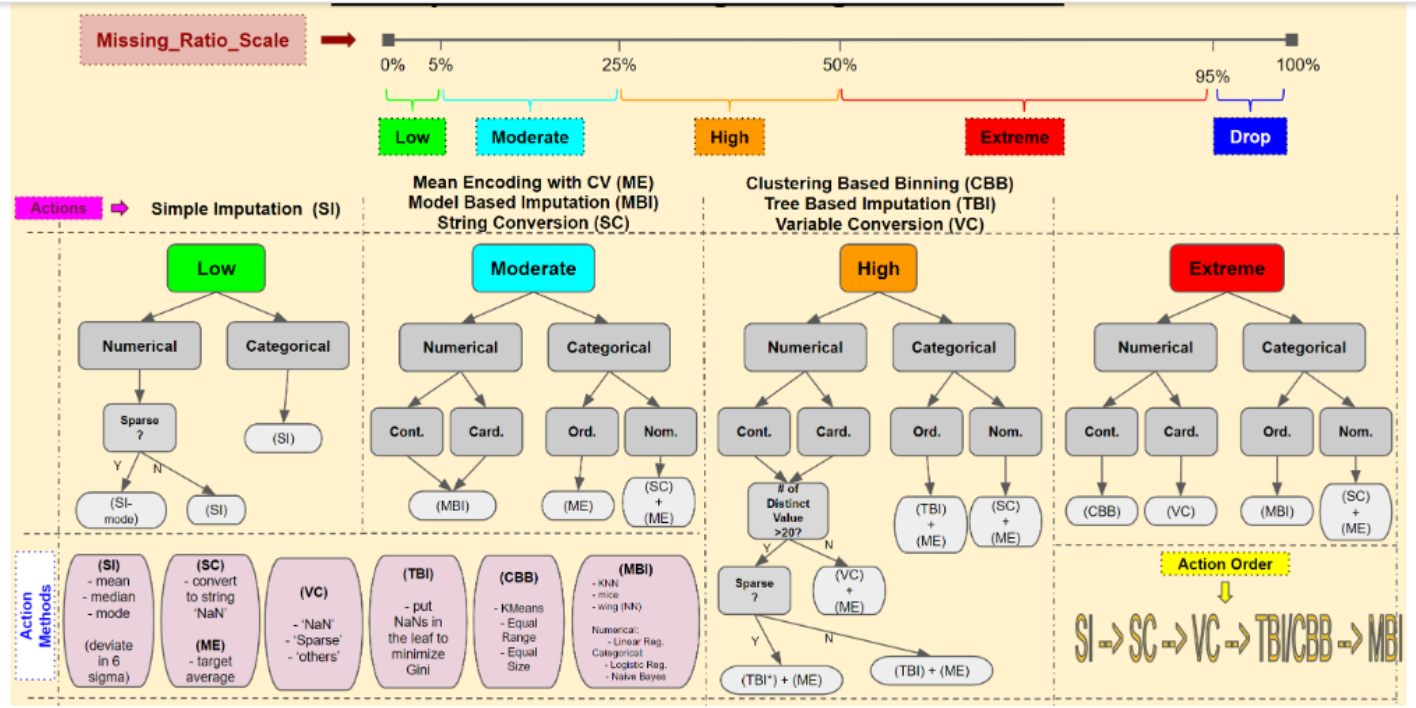

In [60]:
Zero_MR_variables_list = data_info[data_info['%_Missing_Value']==0].index.to_list()

Low_MR_variables_list = data_info[(data_info['%_Missing_Value']>0) & (data_info['%_Missing_Value']<=5)].index.to_list()

Moderate_MR_variables_list = data_info[(data_info['%_Missing_Value']>5) & (data_info['%_Missing_Value']<=25)].index.to_list()

High_MR_variables_list = data_info[(data_info['%_Missing_Value']>25) & (data_info['%_Missing_Value']<=50)].index.to_list()

Extreme_MR_variables_list = data_info[(data_info['%_Missing_Value']>50) & (data_info['%_Missing_Value']<=95)].index.to_list()

Drop_MR_variables_list = data_info[data_info['%_Missing_Value']> 95].index.to_list() # we already dropped these

len(Zero_MR_variables_list),len(Low_MR_variables_list),len(Moderate_MR_variables_list),len(High_MR_variables_list),\
len(Extreme_MR_variables_list),len(Drop_MR_variables_list)

(40, 3, 2, 2, 0, 1)

In [61]:
Low_MR_variables_list

['discharge_disposition_id', 'race', 'gender']

In [62]:
Moderate_MR_variables_list

['admission_type_id', 'admission_source_id']

In [63]:
High_MR_variables_list

['medical_specialty', 'payer_code']

In [64]:
Drop_MR_variables_list

['weight']

In [65]:
numerical_columns = list(data_info.loc[(data_info.loc[:,"Data_Type"]=="int64") |
                                       (data_info.loc[:,"Data_Type"]=="float64")].index)
print(f'number of numerical Columns : {len(numerical_columns)}\n', numerical_columns)

number of numerical Columns : 11
 ['encounter_id', 'number_inpatient', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_diagnoses', 'patient_nbr', 'readmitted']


In [66]:
categorical_columns = list(data_info.loc[(data_info.loc[:,"Data_Type"]=="object") |
                                       (data_info.loc[:,"Data_Type"]=="object")].index)
print(f'number of numerical Columns : {len(categorical_columns)}\n', categorical_columns)

number of numerical Columns : 37
 ['weight', 'medical_specialty', 'payer_code', 'admission_type_id', 'admission_source_id', 'discharge_disposition_id', 'race', 'gender', 'pioglitazone', 'miglitol', 'acarbose', 'rosiglitazone', 'glyburide', 'tolbutamide', 'tolazamide', 'glipizide', 'troglitazone', 'glimepiride-pioglitazone', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'acetohexamide', 'metformin', 'chlorpropamide', 'age', 'diag_1', 'nateglinide', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'repaglinide']


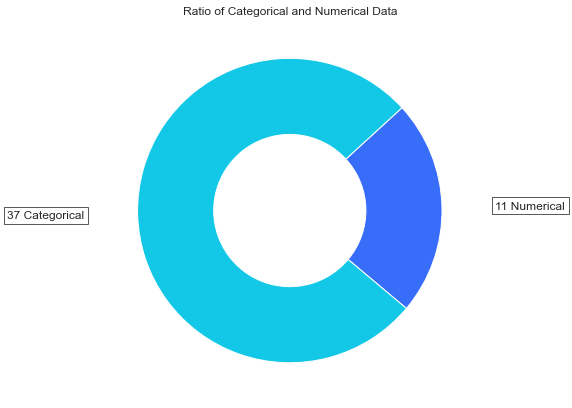

In [67]:
# We Found How Many Categorical And Numerical Columns Are
nb_numerical_columns   = len(numerical_columns)
nb_categorical_columns = len(categorical_columns)

# Visualize
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))

recipe = [str(nb_numerical_columns)+' Numerical',
          str(nb_categorical_columns)+' Categorical']

data = [nb_numerical_columns, nb_categorical_columns]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Ratio of Categorical and Numerical Data")

plt.show()

* **Dropping Extreme MR Variable "weight"**

In [68]:
X_train.drop(['weight'], axis=1, inplace=True)
X_test.drop(['weight'], axis=1, inplace=True)
X_val.drop(['weight'], axis=1, inplace=True)

In [69]:
categorical_columns.remove('weight')

In [70]:
numerical_columns.remove('readmitted')

In [71]:
X_train_numerical = X_train.loc[:,numerical_columns]
X_train_categorical = X_train.loc[:,categorical_columns]

X_val_numerical = X_val.loc[:,numerical_columns]
X_val_categorical = X_val.loc[:,categorical_columns]

X_test_numerical = X_test.loc[:,numerical_columns]
X_test_categorical = X_test.loc[:,categorical_columns]

### 3.1) **Filling Low + Moderate MR Variables with MODE**

In [72]:
low_mod_mr_numerical_cols_train = [col for col in X_train_numerical if col in Low_MR_variables_list+Moderate_MR_variables_list]
low_mod_mr_categorical_cols_train = [col for col in X_train_categorical if col in Low_MR_variables_list+Moderate_MR_variables_list]

low_mod_mr_numerical_cols_test = [col for col in X_test_numerical if col in Low_MR_variables_list+Moderate_MR_variables_list]
low_mod_mr_categorical_cols_test = [col for col in X_test_categorical if col in Low_MR_variables_list+Moderate_MR_variables_list]

low_mod_mr_numerical_cols_val = [col for col in X_train_numerical if col in Low_MR_variables_list+Moderate_MR_variables_list]
low_mod_mr_categorical_cols_val = [col for col in X_train_categorical if col in Low_MR_variables_list+Moderate_MR_variables_list]

In [73]:
low_mod_mr_numerical_cols_train, low_mod_mr_categorical_cols_train

([],
 ['admission_type_id',
  'admission_source_id',
  'discharge_disposition_id',
  'race',
  'gender'])

In [74]:
low_mod_mr_numerical_cols_test, low_mod_mr_categorical_cols_test

([],
 ['admission_type_id',
  'admission_source_id',
  'discharge_disposition_id',
  'race',
  'gender'])

In [75]:
low_mod_mr_numerical_cols_val, low_mod_mr_categorical_cols_val

([],
 ['admission_type_id',
  'admission_source_id',
  'discharge_disposition_id',
  'race',
  'gender'])

* **For Numerical Columns**

**------------------------------------------------------------------------**

* **For Categorical Columns**

In [76]:
train_modes = X_train_categorical.loc[:, low_mod_mr_categorical_cols_train].mode().iloc[0]

In [77]:
X_train_categorical.loc[:,low_mod_mr_categorical_cols_train] = X_train_categorical.loc[:,low_mod_mr_categorical_cols_train].fillna(train_modes)
X_test_categorical.loc[:,low_mod_mr_categorical_cols_test] = X_test_categorical.loc[:,low_mod_mr_categorical_cols_test].fillna(train_modes)
X_val_categorical.loc[:,low_mod_mr_categorical_cols_val] = X_val_categorical.loc[:,low_mod_mr_categorical_cols_val].fillna(train_modes)


In [78]:
X_train_categorical.loc[:,low_mod_mr_categorical_cols_train].isnull().sum()

admission_type_id           0
admission_source_id         0
discharge_disposition_id    0
race                        0
gender                      0
dtype: int64

In [79]:
X_train_categorical.isnull().sum()

medical_specialty           29987
payer_code                  24053
admission_type_id               0
admission_source_id             0
discharge_disposition_id        0
race                            0
gender                          0
pioglitazone                    0
miglitol                        0
acarbose                        0
rosiglitazone                   0
glyburide                       0
tolbutamide                     0
tolazamide                      0
glipizide                       0
troglitazone                    0
glimepiride-pioglitazone        0
insulin                         0
glyburide-metformin             0
glipizide-metformin             0
glimepiride                     0
metformin-rosiglitazone         0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
acetohexamide                   0
metformin                       0
chlorpropamide                  0
age                             0
diag_1        

### 3.2) Filling High MR Variables with SimpleImputer

In [80]:
High_MR_numerical_cols_train = [col for col in X_train_numerical if col in High_MR_variables_list]
High_MR_categorical_cols_train = [col for col in X_train_categorical if col in High_MR_variables_list]

High_MR_numerical_cols_test = [col for col in X_test_numerical if col in High_MR_variables_list]
High_MR_categorical_cols_test = [col for col in X_test_categorical if col in High_MR_variables_list]

High_MR_numerical_cols_val = [col for col in X_train_numerical if col in High_MR_variables_list]
High_MR_categorical_cols_val = [col for col in X_train_categorical if col in High_MR_variables_list]

In [81]:
High_MR_numerical_cols_train, High_MR_categorical_cols_train

([], ['medical_specialty', 'payer_code'])

In [82]:
High_MR_numerical_cols_test, High_MR_categorical_cols_test

([], ['medical_specialty', 'payer_code'])

In [83]:
High_MR_numerical_cols_val, High_MR_categorical_cols_val

([], ['medical_specialty', 'payer_code'])

In [84]:
def SimpleImputerFunc(df, strategy='most_frequent'):
    from sklearn.impute import SimpleImputer
    imp_mode = SimpleImputer(strategy=strategy)
    imp_mode.fit(df.loc[:,High_MR_variables_list])
    df.loc[:,High_MR_variables_list]=imp_mode.fit_transform(df.loc[:,High_MR_variables_list])
    
    return df.loc[:,High_MR_variables_list]

In [85]:
X_train_categorical.loc[:,High_MR_categorical_cols_train] = SimpleImputerFunc(X_train)
X_test_categorical.loc[:,High_MR_categorical_cols_test] = SimpleImputerFunc(X_test)
X_val_categorical.loc[:,High_MR_categorical_cols_val] = SimpleImputerFunc(X_val)

In [86]:
print(X_train.loc[:,High_MR_categorical_cols_train].isnull().sum())
print(X_test.loc[:,High_MR_categorical_cols_train].isnull().sum())
print(X_val.loc[:,High_MR_categorical_cols_train].isnull().sum())

medical_specialty    0
payer_code           0
dtype: int64
medical_specialty    0
payer_code           0
dtype: int64
medical_specialty    0
payer_code           0
dtype: int64


In [87]:
X_train_categorical.isnull().sum()

medical_specialty           0
payer_code                  0
admission_type_id           0
admission_source_id         0
discharge_disposition_id    0
race                        0
gender                      0
pioglitazone                0
miglitol                    0
acarbose                    0
rosiglitazone               0
glyburide                   0
tolbutamide                 0
tolazamide                  0
glipizide                   0
troglitazone                0
glimepiride-pioglitazone    0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride                 0
metformin-rosiglitazone     0
metformin-pioglitazone      0
change                      0
diabetesMed                 0
acetohexamide               0
metformin                   0
chlorpropamide              0
age                         0
diag_1                      0
nateglinide                 0
diag_2                      0
diag_3                      0
max_glu_se

In [88]:
X_train = pd.concat([X_train_numerical, X_train_categorical],axis=1)
X_val = pd.concat([X_val_numerical, X_val_categorical],axis=1)
X_test = pd.concat([X_test_numerical, X_test_categorical],axis=1)

In [89]:
X_train.isnull().sum()

encounter_id                0
number_inpatient            0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_diagnoses            0
patient_nbr                 0
medical_specialty           0
payer_code                  0
admission_type_id           0
admission_source_id         0
discharge_disposition_id    0
race                        0
gender                      0
pioglitazone                0
miglitol                    0
acarbose                    0
rosiglitazone               0
glyburide                   0
tolbutamide                 0
tolazamide                  0
glipizide                   0
troglitazone                0
glimepiride-pioglitazone    0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride                 0
metformin-rosiglitazone     0
metformin-pioglitazone      0
change    

In [90]:
X_test.isnull().sum()

encounter_id                0
number_inpatient            0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_diagnoses            0
patient_nbr                 0
medical_specialty           0
payer_code                  0
admission_type_id           0
admission_source_id         0
discharge_disposition_id    0
race                        0
gender                      0
pioglitazone                0
miglitol                    0
acarbose                    0
rosiglitazone               0
glyburide                   0
tolbutamide                 0
tolazamide                  0
glipizide                   0
troglitazone                0
glimepiride-pioglitazone    0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride                 0
metformin-rosiglitazone     0
metformin-pioglitazone      0
change    

In [91]:
X_val.isnull().sum()

encounter_id                0
number_inpatient            0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_diagnoses            0
patient_nbr                 0
medical_specialty           0
payer_code                  0
admission_type_id           0
admission_source_id         0
discharge_disposition_id    0
race                        0
gender                      0
pioglitazone                0
miglitol                    0
acarbose                    0
rosiglitazone               0
glyburide                   0
tolbutamide                 0
tolazamide                  0
glipizide                   0
troglitazone                0
glimepiride-pioglitazone    0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride                 0
metformin-rosiglitazone     0
metformin-pioglitazone      0
change    

# 4) Feature Engineering

In [92]:
df_train = pd.concat([X_train,y_train], axis=1)
df_test = pd.concat([X_test,y_test], axis=1)
df_val = pd.concat([X_val,y_val], axis=1)

In [93]:
df_val.head()

encounter_id  number_inpatient  time_in_hospital  num_lab_procedures  \
90112   292555458.0               0.0               5.0                67.0   
76035   229089924.0               5.0               2.0                30.0   
60029   168439608.0               1.0               3.0                57.0   
96153   371482094.0               0.0               3.0                30.0   
22769    78181866.0               0.0               8.0                64.0   

       num_procedures  num_medications  number_outpatient  number_emergency  \
90112             0.0             17.0                0.0               0.0   
76035             0.0             15.0                2.0               0.0   
60029             0.0              5.0                0.0               0.0   
96153             1.0             18.0                0.0               1.0   
22769             4.0             43.0                0.0               0.0   

       number_diagnoses  patient_nbr  ... chlorpropamide      age  \
90112               9.0   42878376.0  ...             No  [60-70)   
76035               9.0   42513462.0  ...             No  [70-80)   
60029               5.0   96948324.0  ...             No  [80-90)   
96153               9.0   91964637.0  ...             No  [70-80)   
22769               9.0   21068208.0  ...             No  [70-80)   

            diag_1 nateglinide         diag_2         diag_3 max_glu_serum  \
90112  Respiratory          No       Diabetes    Respiratory          None   
76035    Digestive          No    Circulatory         Others          None   
60029       Others          No    Circulatory  Genitourinary          None   
96153       Injury          No  Genitourinary    Circulatory          None   
22769  Circulatory          No    Circulatory       Diabetes          None   

      A1Cresult repaglinide readmitted  
90112        >8          No          0  
76035      None          No          1  
60029      None          No          1  
96153      None          No          0  
22769      None          No          0  

[5 rows x 47 columns]

In [94]:
df_4 = pd.concat([df_train,df_test,df_val], axis=0) #concatinating again datasets 

In [95]:
df_4.isnull().sum() #Clean Data for Chapter 4 

encounter_id                0
number_inpatient            0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_diagnoses            0
patient_nbr                 0
medical_specialty           0
payer_code                  0
admission_type_id           0
admission_source_id         0
discharge_disposition_id    0
race                        0
gender                      0
pioglitazone                0
miglitol                    0
acarbose                    0
rosiglitazone               0
glyburide                   0
tolbutamide                 0
tolazamide                  0
glipizide                   0
troglitazone                0
glimepiride-pioglitazone    0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride                 0
metformin-rosiglitazone     0
metformin-pioglitazone      0
change    

* Service utilization: The data contains variables for number of inpatient (admissions), emergency room visits and outpatient visits for a given patient in the previous one year. These are (crude) measures of how much hospital/clinic services a person has used in the past year. We added these three to create a new variable called service utilization (see figure below). The idea was to see which version gives us better results. Granted, we did not apply any special weighting to the three ingredients of service utilization but we wanted to try something simple at this stage.

In [96]:
X_train['service_visit'] = X_train['number_outpatient'] + X_train['number_emergency'] + X_train['number_inpatient']
X_val['service_visit'] = X_val['number_outpatient'] + X_val['number_emergency'] + X_val['number_inpatient']
X_test['service_visit'] = X_test['number_outpatient'] + X_test['number_emergency'] + X_test['number_inpatient']

In [97]:
X_train.head(10) # Added 1 new column that named : "service_visit"

encounter_id  number_inpatient  time_in_hospital  num_lab_procedures  \
6958     33715278.0               0.0               3.0                31.0   
53949   157704570.0               0.0               2.0                27.0   
16008    60572904.0               0.0               4.0                47.0   
28956    94827066.0               0.0               3.0                47.0   
66159   184673964.0               4.0               3.0                52.0   
60776   170093724.0               0.0               5.0                66.0   
91961   316077152.0               0.0               1.0                30.0   
86451   274874952.0               1.0               2.0                43.0   
28286    92671038.0               3.0              14.0                66.0   
71809   209037006.0               0.0               2.0                47.0   

       num_procedures  num_medications  number_outpatient  number_emergency  \
6958              5.0             13.0                0.0               0.0   
53949             1.0             10.0                0.0               0.0   
16008             1.0             20.0                0.0               0.0   
28956             0.0             12.0                0.0               0.0   
66159             1.0             11.0                0.0               1.0   
60776             0.0             29.0                0.0               0.0   
91961             2.0              7.0                0.0               0.0   
86451             0.0             11.0                0.0               2.0   
28286             1.0             19.0                1.0               1.0   
71809             0.0             20.0                0.0               0.0   

       number_diagnoses  patient_nbr  ... chlorpropamide      age  \
6958                9.0    6048018.0  ...             No  [50-60)   
53949               9.0  107825391.0  ...             No  [40-50)   
16008               9.0    6291027.0  ...             No  [50-60)   
28956               5.0    1347399.0  ...             No  [70-80)   
66159               9.0   54119835.0  ...             No  [80-90)   
60776               9.0  105384996.0  ...             No  [60-70)   
91961               3.0   39373245.0  ...             No  [40-50)   
86451               7.0   84514689.0  ...             No  [40-50)   
28286               9.0   80750646.0  ...             No  [60-70)   
71809               7.0   40940829.0  ...             No  [70-80)   

                diag_1 nateglinide       diag_2       diag_3 max_glu_serum  \
6958       Circulatory          No  Circulatory     Diabetes          None   
53949        Digestive          No  Circulatory  Circulatory          None   
16008      Circulatory          No     Diabetes  Circulatory          None   
28956      Respiratory          No  Circulatory  Circulatory          None   
66159      Circulatory          No  Circulatory       Others          None   
60776      Respiratory          No  Circulatory  Respiratory          None   
91961  Muscoloskeletal          No     Diabetes       Others          None   
86451           Others          No    Neoplasms    Neoplasms          None   
28286         Diabetes          No  Circulatory  Circulatory          None   
71809      Circulatory          No  Circulatory  Circulatory          None   

      A1Cresult repaglinide service_visit  
6958       None          No           0.0  
53949      None          No           0.0  
16008      None          No           0.0  
28956      Norm          No           0.0  
66159      None          No           5.0  
60776      Norm          No           0.0  
91961      None          No           0.0  
86451      None          No           3.0  
28286        >8          No           5.0  
71809      None          No           0.0  

[10 rows x 47 columns]

* Number of medication changes: The dataset contains 23 features for 23 drugs (or combos) which indicate for each of these, **whether a change in that medication was made or not during the current hospital stay of patient.** **Medication change for diabetics upon admission associated with lower readmission rates.** Decided to count how many changes were made in total for each patient(numchange), and declared that a new feature. The reasoning here was to both simplify the model and possibly discover a relationship with number of changes regardless of which drug was changed.

In [98]:
med_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
            'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 
            'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 
            'troglitazone', 'tolbutamide', 'acetohexamide']

In [99]:
def numchangecounter(df, med_cols):
    for col in med_cols:
        colname = str(col) + 'temp'
        df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

    df['numchange'] = 0
    for col in med_cols:
        colname = str(col) + 'temp'
        df['numchange'] = df['numchange'] + df[colname]
        del df[colname]
        
    return df

In [100]:
X_train = numchangecounter(X_train, med_cols)
X_val = numchangecounter(X_val, med_cols)
X_test = numchangecounter(X_test, med_cols)

In [101]:
X_val.head() # "numchange" column added to the end. Now we have 48 columns

encounter_id  number_inpatient  time_in_hospital  num_lab_procedures  \
90112   292555458.0               0.0               5.0                67.0   
76035   229089924.0               5.0               2.0                30.0   
60029   168439608.0               1.0               3.0                57.0   
96153   371482094.0               0.0               3.0                30.0   
22769    78181866.0               0.0               8.0                64.0   

       num_procedures  num_medications  number_outpatient  number_emergency  \
90112             0.0             17.0                0.0               0.0   
76035             0.0             15.0                2.0               0.0   
60029             0.0              5.0                0.0               0.0   
96153             1.0             18.0                0.0               1.0   
22769             4.0             43.0                0.0               0.0   

       number_diagnoses  patient_nbr  ...      age       diag_1 nateglinide  \
90112               9.0   42878376.0  ...  [60-70)  Respiratory          No   
76035               9.0   42513462.0  ...  [70-80)    Digestive          No   
60029               5.0   96948324.0  ...  [80-90)       Others          No   
96153               9.0   91964637.0  ...  [70-80)       Injury          No   
22769               9.0   21068208.0  ...  [70-80)  Circulatory          No   

              diag_2         diag_3 max_glu_serum A1Cresult repaglinide  \
90112       Diabetes    Respiratory          None        >8          No   
76035    Circulatory         Others          None      None          No   
60029    Circulatory  Genitourinary          None      None          No   
96153  Genitourinary    Circulatory          None      None          No   
22769    Circulatory       Diabetes          None      None          No   

      service_visit numchange  
90112           0.0         1  
76035           7.0         0  
60029           1.0         0  
96153           1.0         0  
22769           0.0         0  

[5 rows x 48 columns]

* **Updating numerical and categorical columns lists :**

In [102]:
numerical_columns.append('service_visit')

In [103]:
numerical_columns.append('numchange')

In [104]:
print(f'{len(numerical_columns)}\n', numerical_columns)

12
 ['encounter_id', 'number_inpatient', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_diagnoses', 'patient_nbr', 'service_visit', 'numchange']


**---------------------------Updating Numerical/Categorical Chart-------------------------------**

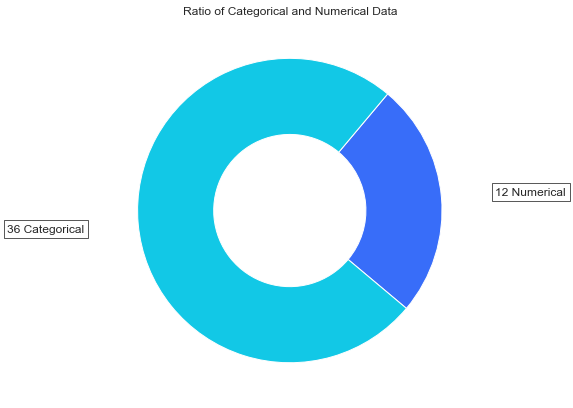

In [105]:
# We Found How Many Categorical And Numerical Columns Are
nb_numerical_columns   = len(numerical_columns)
nb_categorical_columns = len(categorical_columns)

# Visualize
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))

recipe = [str(nb_numerical_columns)+' Numerical',
          str(nb_categorical_columns)+' Categorical']

data = [nb_numerical_columns, nb_categorical_columns]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Ratio of Categorical and Numerical Data")

plt.show()

# 5) Normalization & Encoding

## 5.1) StandartScaling Numerical Colums of Sets

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
X_train_numerical = X_train.loc[:,numerical_columns]
X_train_categorical = X_train.loc[:,categorical_columns]

X_val_numerical = X_val.loc[:,numerical_columns]
X_val_categorical = X_val.loc[:,categorical_columns]

X_test_numerical = X_test.loc[:,numerical_columns]
X_test_categorical = X_test.loc[:,categorical_columns]

In [108]:
std = StandardScaler()

In [109]:
X_train_numerical = pd.DataFrame(std.fit_transform(X_train_numerical),columns=X_train_numerical.columns, index=X_train_numerical.index)
X_val_numerical = pd.DataFrame(std.transform(X_val_numerical),columns=X_val_numerical.columns, index=X_val_numerical.index)
X_test_numerical = pd.DataFrame(std.transform(X_test_numerical),columns=X_test_numerical.columns, index=X_test_numerical.index)

In [110]:
X_train_numerical # Last updated version of X_train_numerical set 

encounter_id  number_inpatient  time_in_hospital  num_lab_procedures  \
6958      -1.285747         -0.542224         -0.471193           -0.614775   
53949     -0.076206         -0.542224         -0.805745           -0.819051   
16008     -1.023745         -0.542224         -0.136641            0.202328   
28956     -0.689589         -0.542224         -0.471193            0.202328   
66159      0.186886          2.974291         -0.471193            0.457672   
...             ...               ...               ...                 ...   
52505     -0.099364         -0.542224          0.532462           -0.001948   
59062      0.010412         -0.542224         -0.136641            0.151259   
81794      0.862490         -0.542224          1.201566            0.406603   
42074     -0.347268          0.336905         -1.140297           -1.227602   
11650     -1.145335          3.853420         -0.471193           -0.001948   

       num_procedures  num_medications  number_outpatient  number_emergency  \
6958         2.146062        -0.382817          -0.362077         -0.313263   
53949       -0.199742        -0.768186          -0.362077         -0.313263   
16008       -0.199742         0.516377          -0.362077         -0.313263   
28956       -0.786193        -0.511273          -0.362077         -0.313263   
66159       -0.199742        -0.639729          -0.362077          1.591840   
...               ...              ...                ...               ...   
52505       -0.786193         0.259465          -0.362077         -0.313263   
59062       -0.786193         0.002552          -0.362077         -0.313263   
81794        2.732513         3.470872          -0.362077         -0.313263   
42074       -0.786193        -1.282011          -0.362077          5.402046   
11650       -0.786193        -0.254361          -0.362077          5.402046   

       number_diagnoses  patient_nbr  service_visit  numchange  
6958           0.826239    -1.263631      -0.624054   1.453206  
53949          0.826239     1.404697      -0.624054  -0.591968  
16008          0.826239    -1.257260      -0.624054  -0.591968  
28956         -1.262120    -1.386868      -0.624054  -0.591968  
66159          0.826239    -0.003318       2.184446  -0.591968  
...                 ...          ...            ...        ...  
52505         -0.217941     0.599976      -0.624054  -0.591968  
59062          0.826239    -0.650224      -0.624054  -0.591968  
81794          0.826239    -0.550399      -0.624054   1.453206  
42074          0.304149     0.927984       1.622746  -0.591968  
11650         -2.306299     0.808209       3.869545  -0.591968  

[61058 rows x 12 columns]

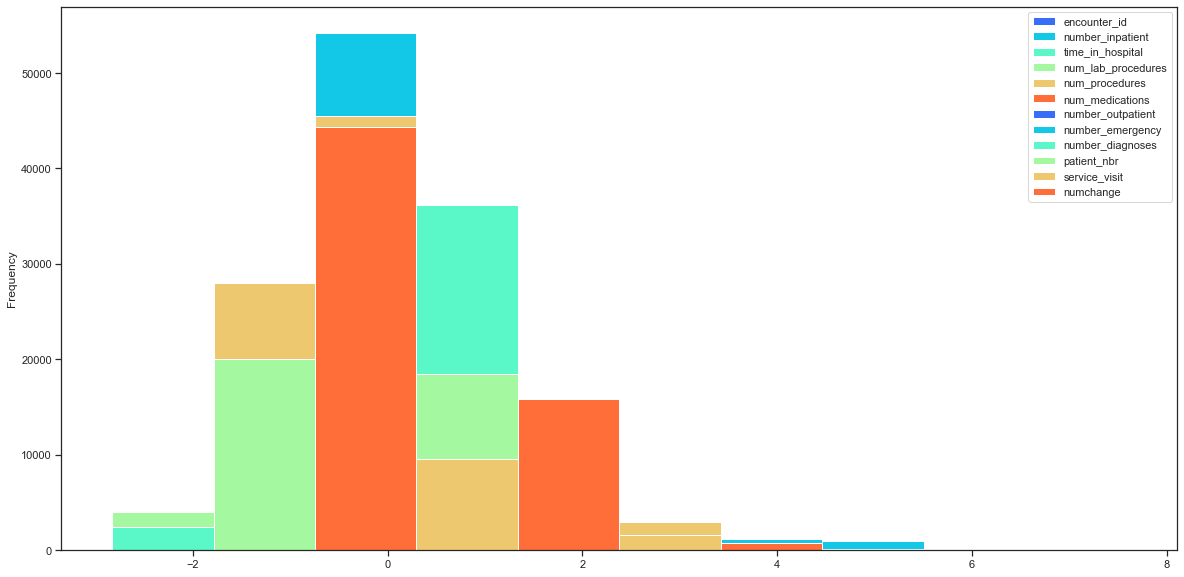

In [111]:
X_train_numerical.plot(kind="hist")

## 5.2) Encoding for Categorical Features

### 5.2.1) Binary Encoding

In [112]:
print(f'{len(X_train_categorical.columns)}\n', X_train_categorical.columns)

36
 Index(['medical_specialty', 'payer_code', 'admission_type_id',
       'admission_source_id', 'discharge_disposition_id', 'race', 'gender',
       'pioglitazone', 'miglitol', 'acarbose', 'rosiglitazone', 'glyburide',
       'tolbutamide', 'tolazamide', 'glipizide', 'troglitazone',
       'glimepiride-pioglitazone', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'acetohexamide',
       'metformin', 'chlorpropamide', 'age', 'diag_1', 'nateglinide', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'repaglinide'],
      dtype='object')


* **Binary Encoding Features**

In [113]:
binary_enc_features = ['admission_type_id', 'discharge_disposition_id',
                       'diag_1', 'diag_2', 'diag_3' ]

**Binary Encoded Forms of Train/Test/Valid Sets:**

In [114]:
X_train_categorical_binary = X_train_categorical.loc[:, binary_enc_features]
X_val_categorical_binary = X_val_categorical.loc[:, binary_enc_features]
X_test_categorical_binary = X_test_categorical.loc[:, binary_enc_features]

In [115]:
from category_encoders import BinaryEncoder

In [116]:
bin_enc = BinaryEncoder(cols= binary_enc_features) ##Binary Encoding Object

In [117]:
X_train_categorical_binary_encoded = bin_enc.fit_transform(X_train_categorical_binary)
X_val_categorical_binary_encoded = bin_enc.fit_transform(X_val_categorical_binary)
X_test_categorical_binary_encoded = bin_enc.fit_transform(X_test_categorical_binary)

In [118]:
X_val_categorical_binary_encoded.columns

Index(['admission_type_id_0', 'admission_type_id_1', 'admission_type_id_2',
       'discharge_disposition_id_0', 'discharge_disposition_id_1',
       'discharge_disposition_id_2', 'discharge_disposition_id_3', 'diag_1_0',
       'diag_1_1', 'diag_1_2', 'diag_1_3', 'diag_1_4', 'diag_2_0', 'diag_2_1',
       'diag_2_2', 'diag_2_3', 'diag_2_4', 'diag_3_0', 'diag_3_1', 'diag_3_2',
       'diag_3_3', 'diag_3_4'],
      dtype='object')

### 5.2.2) Encoding by "Mapping" 

In [119]:
replace_list = ['max_glu_serum','A1Cresult', 'change', 'diabetesMed', 'gender', 'age', 'race', 'metformin', 
                'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
                'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 
                'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 
                'troglitazone', 'tolbutamide', 'acetohexamide','admission_source_id' ]

In [120]:
X_train_replace = X_train.loc[:,replace_list]
X_test_replace = X_test.loc[:,replace_list]
X_val_replace = X_val.loc[:,replace_list]

In [121]:
X_val_replace.head()

max_glu_serum A1Cresult change diabetesMed  gender      age       race  \
90112          None        >8     Ch         Yes    Male  [60-70)  Caucasian   
76035          None      None     No         Yes    Male  [70-80)  Caucasian   
60029          None      None     No         Yes    Male  [80-90)  Caucasian   
96153          None      None     No         Yes  Female  [70-80)  Caucasian   
22769          None      None     Ch         Yes    Male  [70-80)  Caucasian   

      metformin repaglinide nateglinide  ... glyburide-metformin tolazamide  \
90112        No          No          No  ...                  No         No   
76035        No          No          No  ...                  No         No   
60029        No          No          No  ...                  No         No   
96153        No          No          No  ...                  No         No   
22769        No          No          No  ...                  No         No   

      metformin-pioglitazone metformin-rosiglitazone glimepiride-pioglitazone  \
90112                     No                      No                       No   
76035                     No                      No                       No   
60029                     No                      No                       No   
96153                     No                      No                       No   
22769                     No                      No                       No   

      glipizide-metformin troglitazone tolbutamide acetohexamide  \
90112                  No           No          No            No   
76035                  No           No          No            No   
60029                  No           No          No            No   
96153                  No           No          No            No   
22769                  No           No          No            No   

      admission_source_id  
90112       EmergencyRoom  
76035       EmergencyRoom  
60029       EmergencyRoom  
96153       EmergencyRoom  
22769            Referral  

[5 rows x 29 columns]

In [122]:
def ReplaceEncoder(df):

    admission_source_id_dict = {'EmergencyRoom':1, 'TransferedFromHosp':2, 'Referral':3,
       'Court/LawEnforcement':4, 'Delivery':5}
    
    max_glu_serum_dict = {'None':0,
                          'Norm':1,
                          '>200':2,
                          '>300':3
                         }
    A1Cresult_dict = {'None':0,
                      'Norm':1,
                      '>7':2,
                      '>8':3
                     }

    change_dict = {'No':0,
                   'Ch':1
                  }

    diabetesMed_dict = {'No':0,
                        'Yes':1
                       }
    gender_dict = {'Male':0,
                   'Female':1}
    age_dict =  {"[0-10)": 1, "[10-20)": 2,
                 "[20-30)": 3,"[30-40)": 4,
                 "[40-50)": 5,"[50-60)": 6, 
                 "[60-70)": 7,"[70-80)": 8,
                 "[80-90)": 9,"[90-100)": 10}
    
    race_dict = {'Caucasian':1, 'AfricanAmerican':2, 'Other':3, 'Asian':4, 'Hispanic':5}

    med_cols_dict = {'Up':1,
                     'Down':-1,
                     'Steady':0,
                     'No':0
                       }
    med_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
            'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 
            'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 
            'troglitazone', 'tolbutamide', 'acetohexamide']

    for col in med_cols:
        df[col] = df[col].replace(med_cols_dict)

    df['admission_source_id'] = df['admission_source_id'].replace(admission_source_id_dict)
    df['max_glu_serum'] = df['max_glu_serum'].replace(max_glu_serum_dict)
    df['race'] = df['race'].replace(race_dict)
    df['gender'] = df['gender'].replace(gender_dict)
    df['age'] = df['age'].replace(age_dict)
    df['A1Cresult'] = df['A1Cresult'].replace(A1Cresult_dict)
    df['change'] = df['change'].replace(change_dict)
    df['diabetesMed'] = df['diabetesMed'].replace(diabetesMed_dict)

    return df

In [123]:
X_train_rep = ReplaceEncoder(X_train_replace)
X_val_rep = ReplaceEncoder(X_val_replace)
X_test_rep = ReplaceEncoder(X_test_replace)

In [124]:
X_train_rep.head()

max_glu_serum  A1Cresult  change  diabetesMed  gender  age  race  \
6958               0          0       1            1       1    6     1   
53949              0          0       0            1       0    5     1   
16008              0          0       1            1       0    6     1   
28956              0          1       1            1       1    8     2   
66159              0          0       1            1       1    9     1   

       metformin  repaglinide  nateglinide  ...  glyburide-metformin  \
6958           0            0            0  ...                    0   
53949          0            0            0  ...                    0   
16008          0            0            0  ...                    0   
28956          0            0            0  ...                    0   
66159          0            0            0  ...                    0   

       tolazamide  metformin-pioglitazone  metformin-rosiglitazone  \
6958            0                       0                        0   
53949           0                       0                        0   
16008           0                       0                        0   
28956           0                       0                        0   
66159           0                       0                        0   

       glimepiride-pioglitazone  glipizide-metformin  troglitazone  \
6958                          0                    0             0   
53949                         0                    0             0   
16008                         0                    0             0   
28956                         0                    0             0   
66159                         0                    0             0   

       tolbutamide  acetohexamide  admission_source_id  
6958             0              0                    3  
53949            0              0                    1  
16008            0              0                    3  
28956            0              0                    3  
66159            0              0                    1  

[5 rows x 29 columns]

In [125]:
X_train_categorical_binary_encoded.head()

admission_type_id_0  admission_type_id_1  admission_type_id_2  \
6958                     0                    0                    1   
53949                    0                    0                    1   
16008                    0                    1                    0   
28956                    0                    0                    1   
66159                    0                    0                    1   

       discharge_disposition_id_0  discharge_disposition_id_1  \
6958                            0                           0   
53949                           0                           0   
16008                           0                           0   
28956                           0                           0   
66159                           0                           0   

       discharge_disposition_id_2  discharge_disposition_id_3  diag_1_0  \
6958                            0                           1         0   
53949                           0                           1         0   
16008                           0                           1         0   
28956                           0                           1         0   
66159                           0                           1         0   

       diag_1_1  diag_1_2  ...  diag_2_0  diag_2_1  diag_2_2  diag_2_3  \
6958          0         0  ...         0         0         0         0   
53949         0         0  ...         0         0         0         0   
16008         0         0  ...         0         0         0         1   
28956         0         0  ...         0         0         0         0   
66159         0         0  ...         0         0         0         0   

       diag_2_4  diag_3_0  diag_3_1  diag_3_2  diag_3_3  diag_3_4  
6958          1         0         0         0         0         1  
53949         1         0         0         0         1         0  
16008         0         0         0         0         1         0  
28956         1         0         0         0         1         0  
66159         1         0         0         0         1         1  

[5 rows x 22 columns]

**--------- Categoric "X" Sets Concat -----------**

In [126]:
X_train_cat_end = pd.concat([X_train_rep, X_train_categorical_binary_encoded],axis=1)
X_val_cat_end = pd.concat([X_val_rep, X_val_categorical_binary_encoded],axis=1)
X_test_cat_end = pd.concat([X_test_rep, X_test_categorical_binary_encoded],axis=1)

**--------- Final "X" Sets Concat -----------**

In [127]:
X_train = pd.concat([X_train_numerical, X_train_cat_end],axis=1)
X_val = pd.concat([X_val_numerical, X_val_cat_end],axis=1)
X_test = pd.concat([X_test_numerical, X_test_cat_end],axis=1)

In [128]:
X_train.shape, X_test.shape, X_val.shape

((61058, 63), (20354, 63), (20354, 63))

# 6) Model Selection & Performance 

In [129]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve, plot_precision_recall_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

## 6.1) Feature Importance

In [130]:
xgb = XGBClassifier(n_estimators=100, random_state=24, n_jobs=2)
xgb.fit(X_train, y_train)
features = X_train.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)

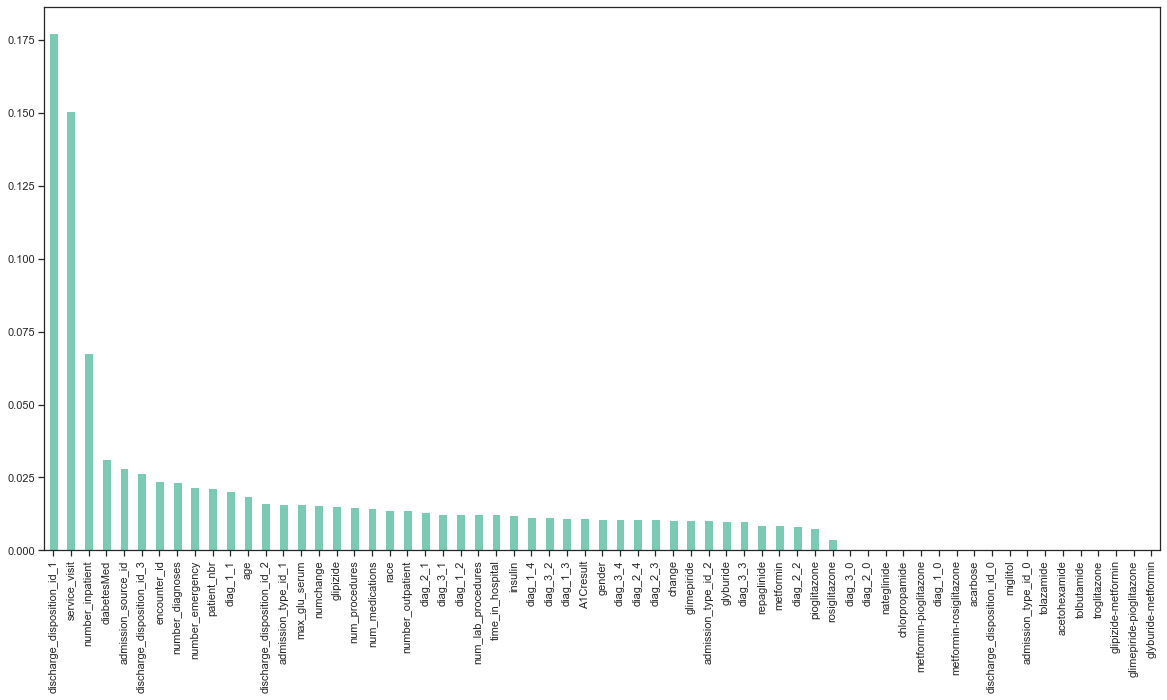

In [131]:
plt.figure(figsize=(20,10))
feat_importances = pd.Series(importances, index=features)
feat_importances.nlargest(len(indices)).plot(kind='bar',color = '#79CCB3');


## 6.2) Modelling

In [132]:
# Creating an empty Dataframe with Scores
df_accur_roc_score = pd.DataFrame(columns=['Roc_Auc_Score'])

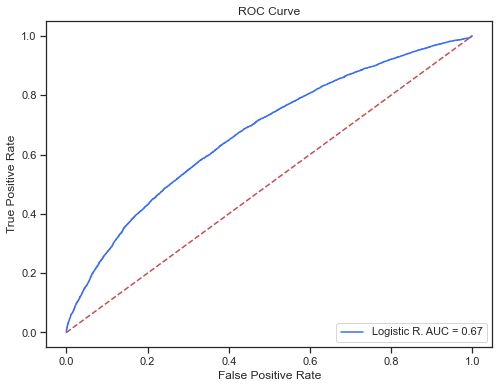

In [133]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(random_state=0)
log_clf.fit(X_train, y_train)

y_preds = log_clf.predict_proba(X_test)
preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score.loc['Logistic_regression'] = [auc_score]

plt.subplots(figsize=(8, 6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='Logistic R. AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'r--')


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

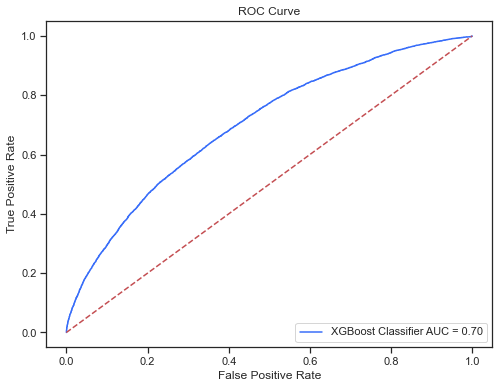

In [134]:
import xgboost as xgb

xgb_model1 = xgb.XGBClassifier(n_estimators=150,random_state=0,learning_rate=0.25,eta=0.4,booster="gbtree",base_score=0.8,colsample_bylevel=0.9009229642844634,gamma=0.49967765132613584,
                        max_depth=6,min_child_weight=7,reg_lambda=0.27611902459972926,subsample=0.9300916052594785)

xgb_model1.fit(X_train, y_train)

y_preds = xgb_model1.predict_proba(X_test)
preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score.loc['XGBoost_Classifier'] = [auc_score]

plt.subplots(figsize=(8, 6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='XGBoost Classifier AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'r--')


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

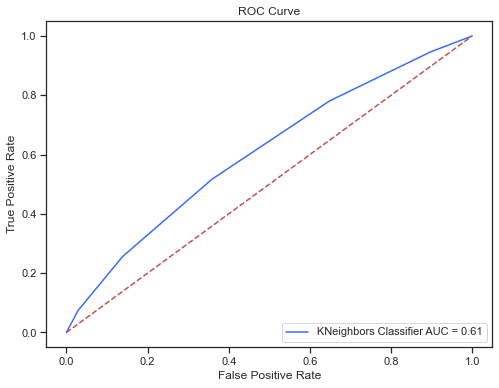

In [135]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier()
knn1.fit(X_train,y_train)
y_preds = knn1.predict_proba(X_test)
preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score.loc['KNeighborsClassifier'] = [auc_score]

plt.subplots(figsize=(8, 6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='KNeighbors Classifier AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'r--')


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

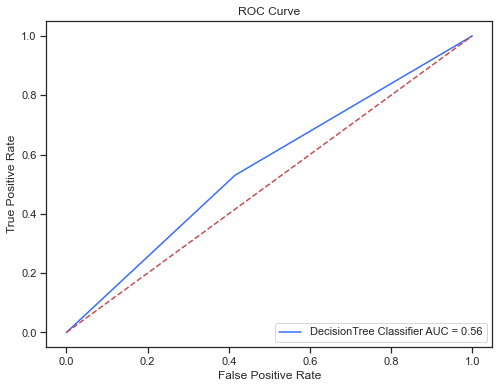

In [136]:
from sklearn.tree import DecisionTreeClassifier

reg_dtr1 = DecisionTreeClassifier(random_state=0)
reg_dtr1.fit(X_train,y_train)

y_preds = reg_dtr1.predict_proba(X_test)
preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score.loc['DecisionTreeClassifier'] = [auc_score]

plt.subplots(figsize=(8, 6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='DecisionTree Classifier AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'r--')


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

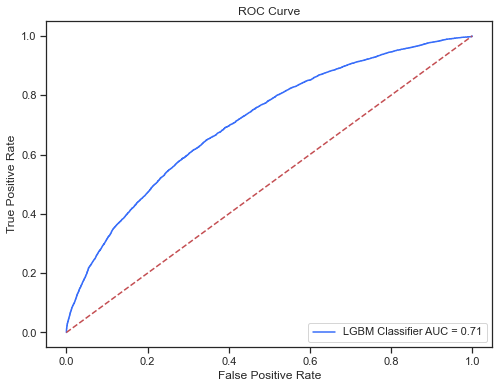

In [137]:
from lightgbm import LGBMClassifier

lgbm1 = LGBMClassifier(
        max_depth=6,
        n_estimators=100,random_state=0,learning_rate=0.1,eta=0.4,base_score=0.8,colsample_bylevel=0.9009229642844634,gamma=0.49967765132613584,
                        min_child_weight=9,reg_lambda=0.27611902459972926,subsample=0.9300916052594785,min_samples_split=2,min_samples_leaf=0.1)

lgbm1.fit(X_train, y_train)

y_preds = lgbm1.predict_proba(X_test)
preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score.loc['LGBMClassifier'] = [auc_score]

plt.subplots(figsize=(8, 6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='LGBM Classifier AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'r--')


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

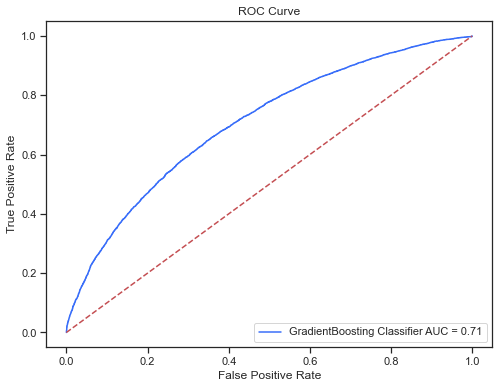

In [138]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_clf1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                                   max_depth=7, random_state=0).fit(X_train, y_train)

y_preds = gradient_boosting_clf1.predict_proba(X_test)
preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score.loc['GradientBoostingClassifier'] = [auc_score]

plt.subplots(figsize=(8, 6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='GradientBoosting Classifier AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'r--')


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

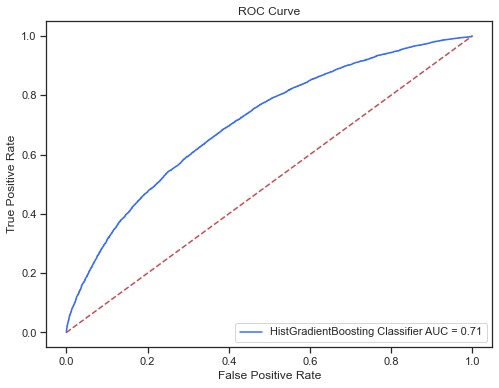

In [139]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier


hist_gradient_boosting_clf1 = HistGradientBoostingClassifier(learning_rate=0.25,
                                                   max_depth=4, random_state=0).fit(X_train, y_train)

y_preds = hist_gradient_boosting_clf1.predict_proba(X_test)
preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score.loc['HistGradientBoostingClassifier'] = [auc_score]

plt.subplots(figsize=(8, 6))
plt.plot(fpr, tpr, label='HistGradientBoosting Classifier AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve')


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

In [140]:
df_accur_roc_score

Roc_Auc_Score
Logistic_regression                  0.673508
XGBoost_Classifier                   0.700201
KNeighborsClassifier                 0.607096
DecisionTreeClassifier               0.557349
LGBMClassifier                       0.709796
GradientBoostingClassifier           0.705430
HistGradientBoostingClassifier       0.707947

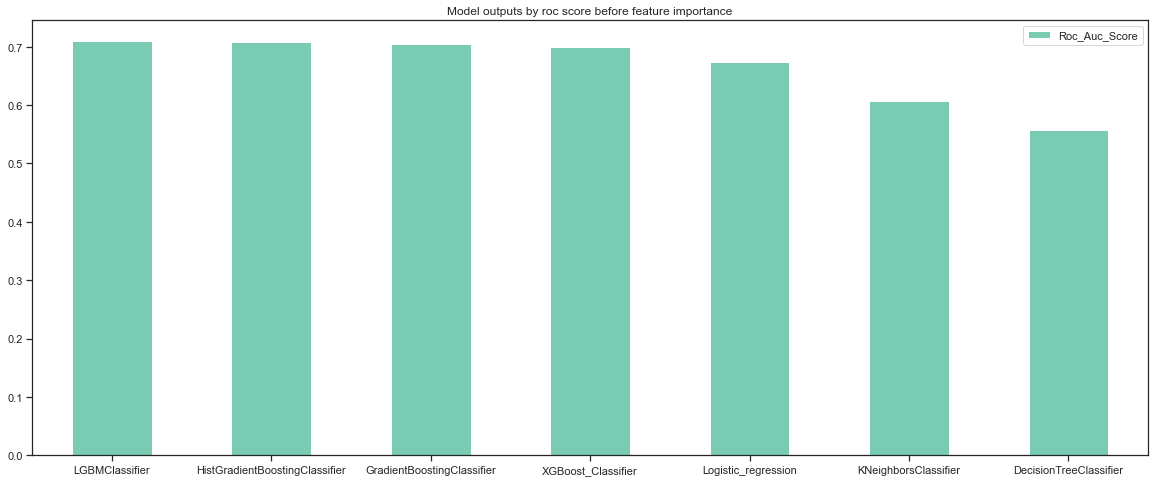

In [141]:
df_accur_roc_score.sort_values(by=['Roc_Auc_Score'],ascending=False).plot(kind='bar', y='Roc_Auc_Score',figsize=(20,8),color='#79ccb3', rot=0,title="Model outputs by roc score before feature importance");

In [142]:
lst_importance_drop = []

for item in range(0,feat_importances.shape[0]):
  
  if(feat_importances[item] < 0.02):
    lst_importance_drop.append(features[item])

X_train_importance = X_train.drop(lst_importance_drop,axis=1)
X_test_importance = X_test.drop(lst_importance_drop,axis=1)
X_val_importance = X_val.drop(lst_importance_drop,axis=1)

lst_importance_drop

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'numchange',
 'max_glu_serum',
 'A1Cresult',
 'change',
 'gender',
 'age',
 'race',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'insulin',
 'glyburide-metformin',
 'tolazamide',
 'metformin-pioglitazone',
 'metformin-rosiglitazone',
 'glimepiride-pioglitazone',
 'glipizide-metformin',
 'troglitazone',
 'tolbutamide',
 'acetohexamide',
 'admission_type_id_0',
 'admission_type_id_1',
 'admission_type_id_2',
 'discharge_disposition_id_0',
 'discharge_disposition_id_2',
 'diag_1_0',
 'diag_1_2',
 'diag_1_3',
 'diag_1_4',
 'diag_2_0',
 'diag_2_1',
 'diag_2_2',
 'diag_2_3',
 'diag_2_4',
 'diag_3_0',
 'diag_3_1',
 'diag_3_2',
 'diag_3_3',
 'diag_3_4']

In [143]:
# Creating an empty Dataframe with Scores
df_accur_roc_score_importance = pd.DataFrame(columns=['Roc_Auc_Score'])

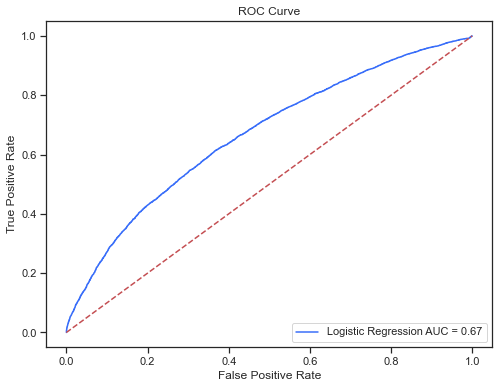

In [144]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0)
clf = logreg.fit(X_train_importance, y_train)

y_preds = clf.predict_proba(X_test_importance)
preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score_importance.loc['Logistic_regression'] = [auc_score]

plt.subplots(figsize=(8, 6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='Logistic Regression AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'r--')


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

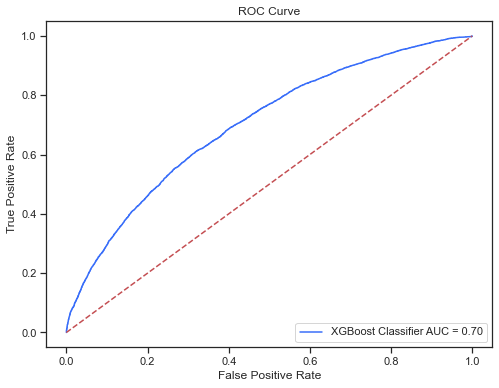

In [145]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=150,random_state=0,learning_rate=0.1,eta=0.4,booster="gbtree",base_score=0.8,colsample_bylevel=0.9009229642844634,gamma=0.49967765132613584,
                        max_depth=6,min_child_weight=7,reg_lambda=0.27611902459972926,subsample=0.9300916052594785)

xgb_model.fit(X_train_importance, y_train)
y_preds = xgb_model.predict_proba(X_test_importance)
preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score_importance.loc['XGBoost_Classifier'] = [auc_score]

plt.subplots(figsize=(8, 6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='XGBoost Classifier AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'r--')


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

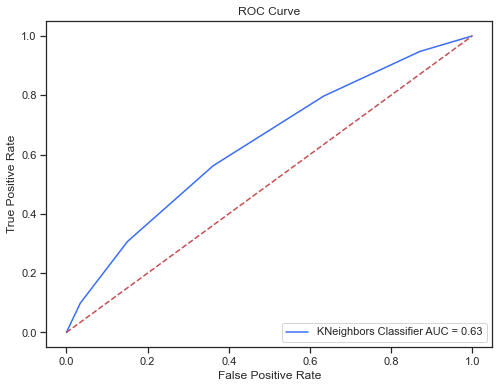

In [146]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_importance,y_train)
y_preds = knn.predict_proba(X_test_importance)
preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score_importance.loc['KNeighborsClassifier'] = [auc_score]

plt.subplots(figsize=(8, 6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='KNeighbors Classifier AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'r--')


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

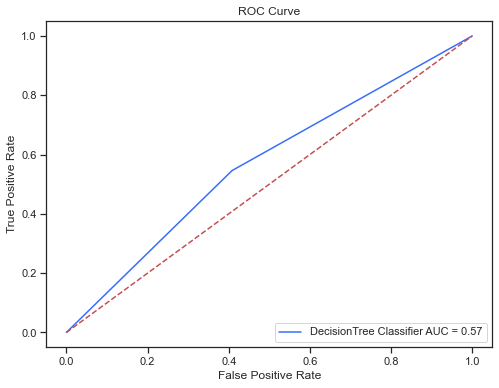

In [147]:
from sklearn.tree import DecisionTreeClassifier

reg_dtr = DecisionTreeClassifier(random_state=0)
reg_dtr.fit(X_train_importance,y_train)

y_preds = reg_dtr.predict_proba(X_test_importance)
preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score_importance.loc['DecisionTreeClassifier'] = [auc_score]

plt.subplots(figsize=(8, 6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='DecisionTree Classifier AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'r--')


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

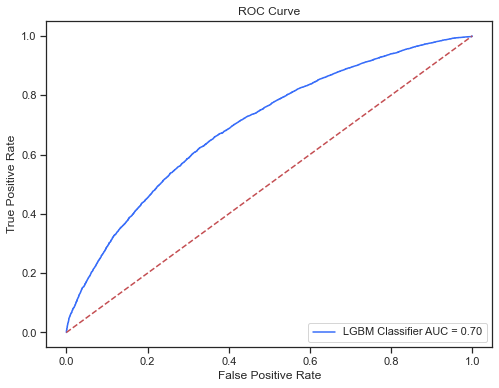

In [148]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
        max_depth=6,
        n_estimators=100,random_state=0,learning_rate=0.25,eta=0.4,base_score=0.8,colsample_bylevel=0.9009229642844634,gamma=0.49967765132613584,
                        min_child_weight=7,reg_lambda=0.27611902459972926,subsample=0.9300916052594785,min_sample_split=2)

lgbm.fit(X_train_importance, y_train)

y_preds = lgbm.predict_proba(X_test_importance)
preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score_importance.loc['LGBMClassifier'] = [auc_score]

plt.subplots(figsize=(8, 6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='LGBM Classifier AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'r--')


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

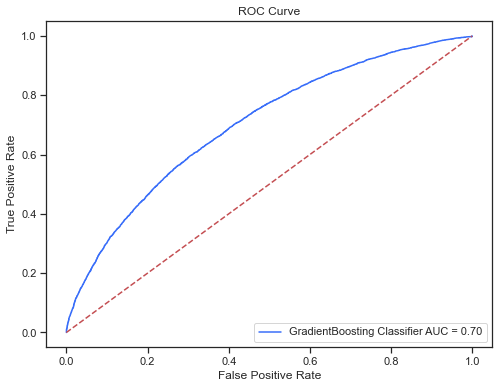

In [149]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                                   max_depth=5, random_state=0).fit(X_train_importance, y_train)


y_preds = gradient_boosting_clf.predict_proba(X_test_importance)
preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score_importance.loc['GradientBoostingClassifier'] = [auc_score]

plt.subplots(figsize=(8, 6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='GradientBoosting Classifier AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'r--')


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

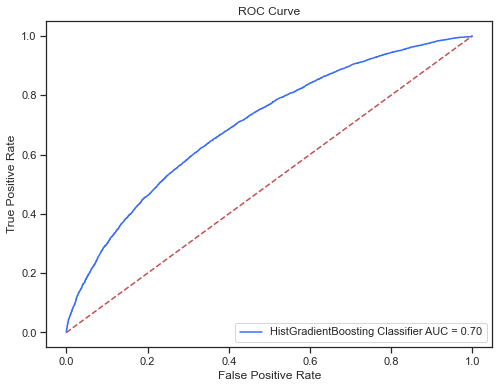

In [150]:
from sklearn.ensemble import HistGradientBoostingClassifier

hist_gradient_boosting_clf = HistGradientBoostingClassifier(learning_rate=0.1,
                                                   max_depth=7, random_state=0).fit(X_train_importance, y_train)

y_preds = hist_gradient_boosting_clf.predict_proba(X_test_importance)
preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score_importance.loc['HistGradientBoostingClassifier'] = [auc_score]
plt.subplots(figsize=(8, 6))
plt.plot(fpr, tpr, label='HistGradientBoosting Classifier AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve')


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

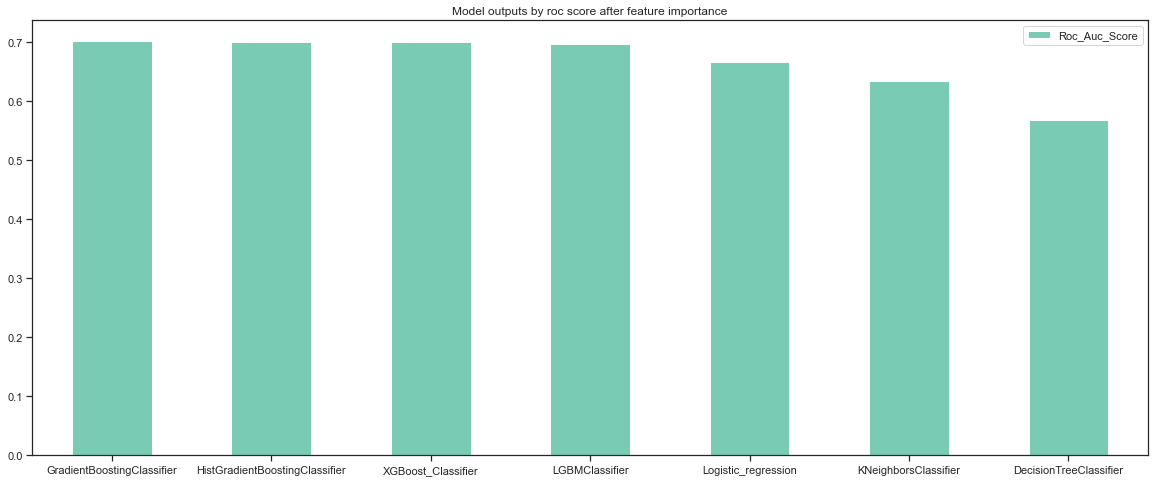

In [151]:
df_accur_roc_score_importance.sort_values(by=['Roc_Auc_Score'],ascending=False).plot(kind='bar', y='Roc_Auc_Score',figsize=(20,8),color='#79ccb3', rot=0,title="Model outputs by roc score after feature importance");

## Visualization for After Feature Importance and Before Feature Importance

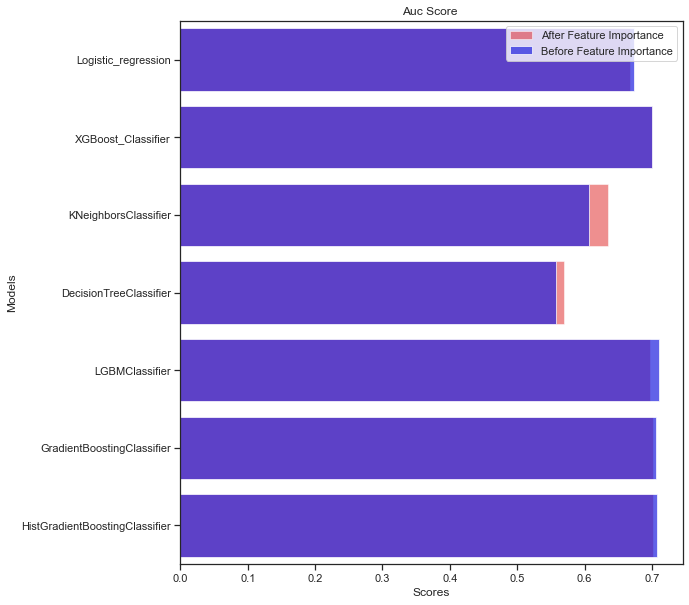

In [152]:
f,ax = plt.subplots(figsize = (9,10))
sns.barplot(x=df_accur_roc_score_importance.Roc_Auc_Score,y=df_accur_roc_score_importance.index,color='red',alpha = 0.5,label='After Feature Importance' )
sns.barplot(x=df_accur_roc_score.Roc_Auc_Score,y=df_accur_roc_score.index,color='blue',alpha = 0.7,label='Before Feature Importance')

ax.legend(frameon = True)
ax.set(xlabel='Scores', ylabel='Models',title = "Auc Score ")
plt.show()

In [153]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Before Feature Importance', y=df_accur_roc_score.Roc_Auc_Score, x=df_accur_roc_score.index,text=round(df_accur_roc_score.Roc_Auc_Score,3),textposition='auto'),
    go.Bar(name='After Feature Importance', y=df_accur_roc_score_importance.Roc_Auc_Score, x=df_accur_roc_score_importance.index,text=round(df_accur_roc_score_importance.Roc_Auc_Score,3),textposition='auto',)
    
])
fig.update_layout(barmode='group')
fig.show()

--------LogisticRegression--------
The accuracy of model LogisticRegression is 0.63
              precision    recall  f1-score   support

           0       0.63      0.77      0.69     10997
           1       0.63      0.47      0.54      9357

    accuracy                           0.63     20354
   macro avg       0.63      0.62      0.62     20354
weighted avg       0.63      0.63      0.62     20354





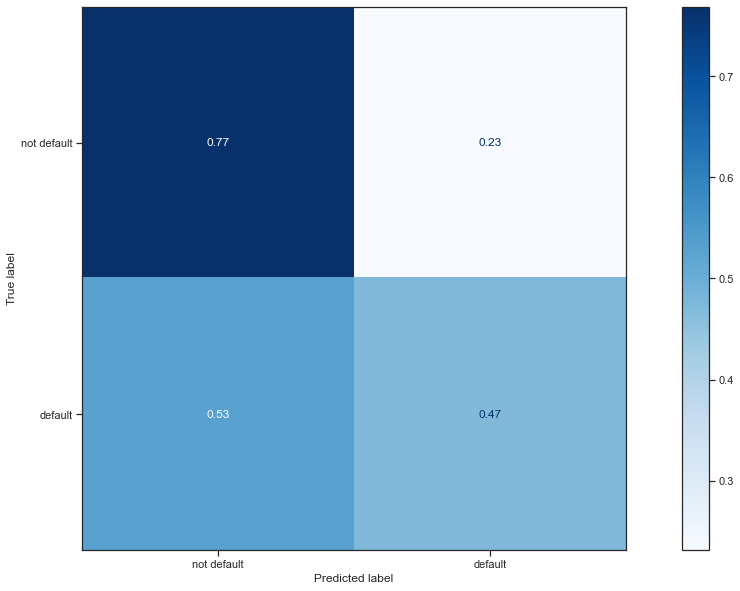

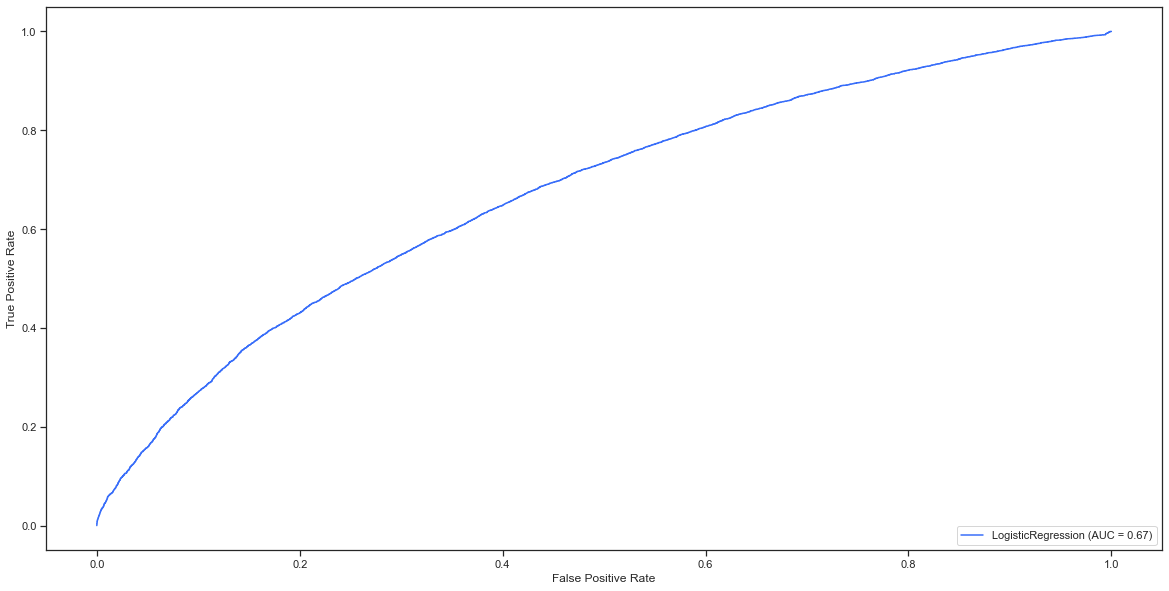

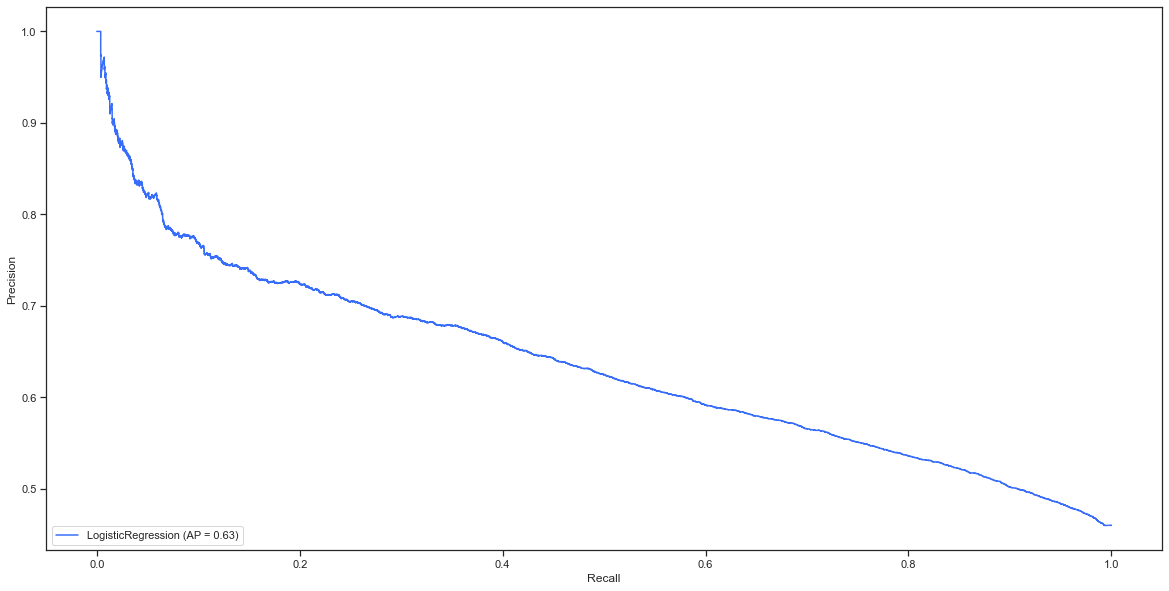

--------XGBClassifier--------
The accuracy of model XGBClassifier is 0.65
              precision    recall  f1-score   support

           0       0.66      0.70      0.68     10997
           1       0.62      0.58      0.60      9357

    accuracy                           0.65     20354
   macro avg       0.64      0.64      0.64     20354
weighted avg       0.64      0.65      0.64     20354





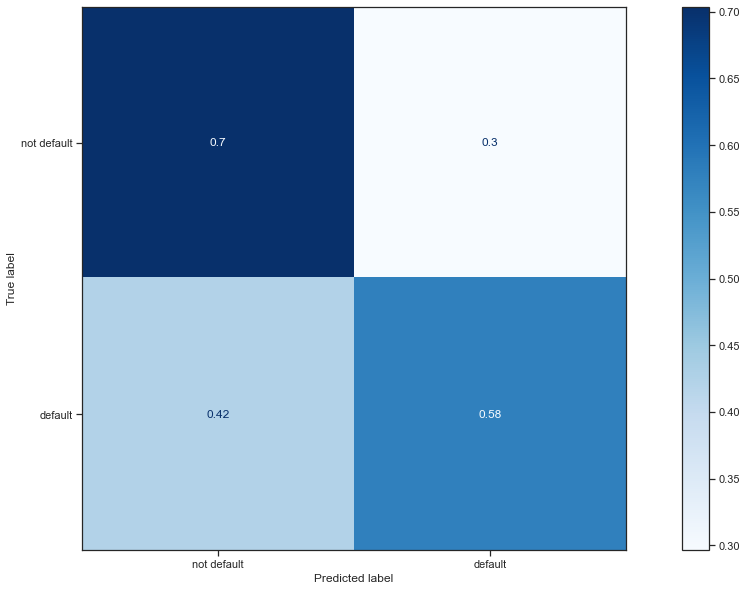

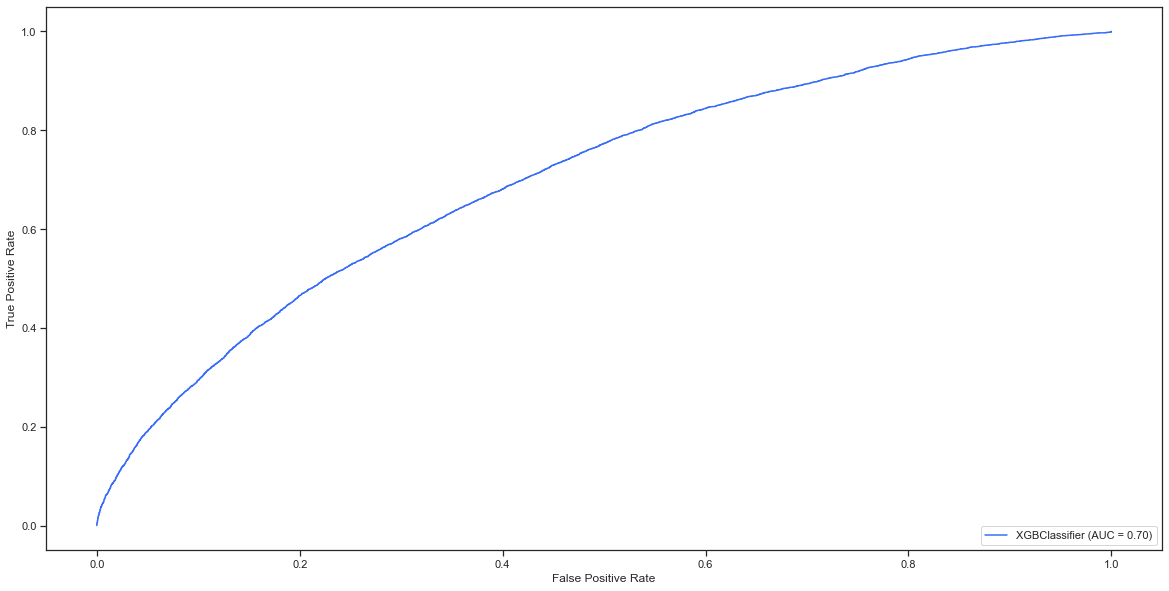

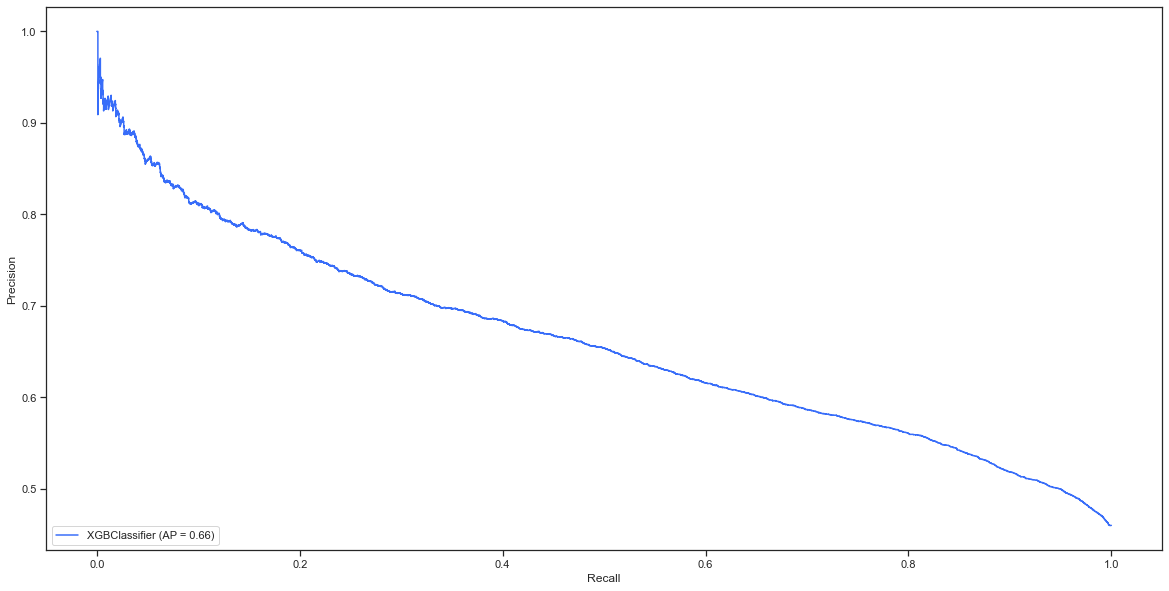

--------KNeighborsClassifier--------
The accuracy of model KNeighborsClassifier is 0.58
              precision    recall  f1-score   support

           0       0.61      0.64      0.62     10997
           1       0.55      0.52      0.53      9357

    accuracy                           0.58     20354
   macro avg       0.58      0.58      0.58     20354
weighted avg       0.58      0.58      0.58     20354





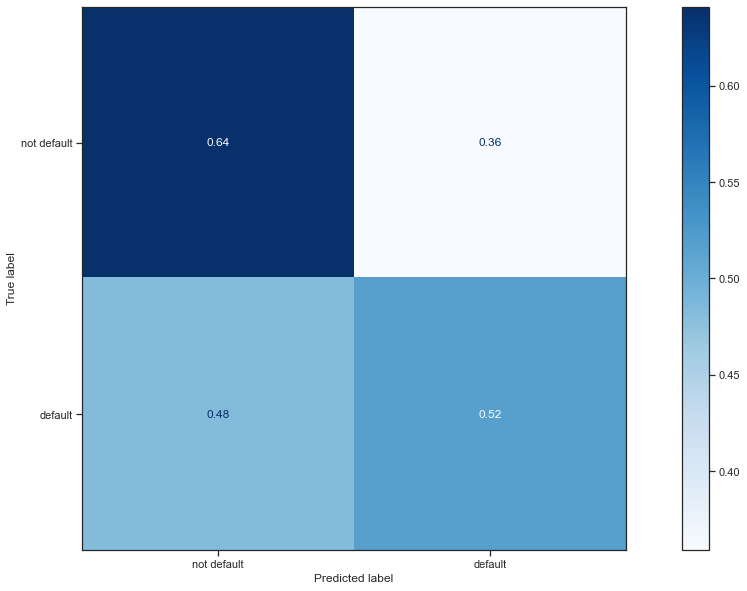

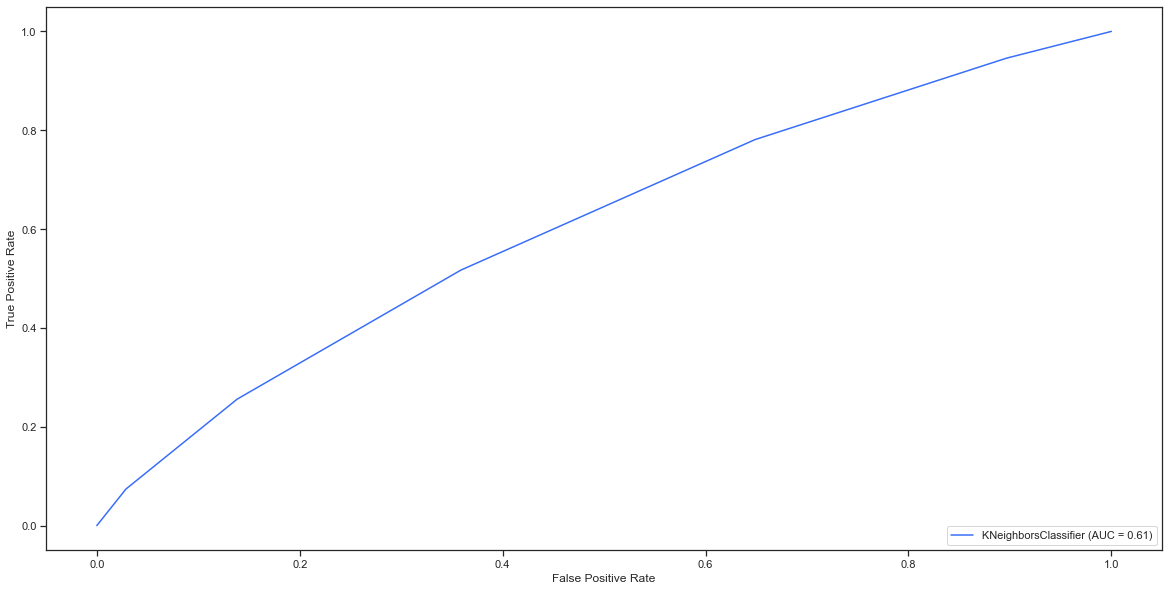

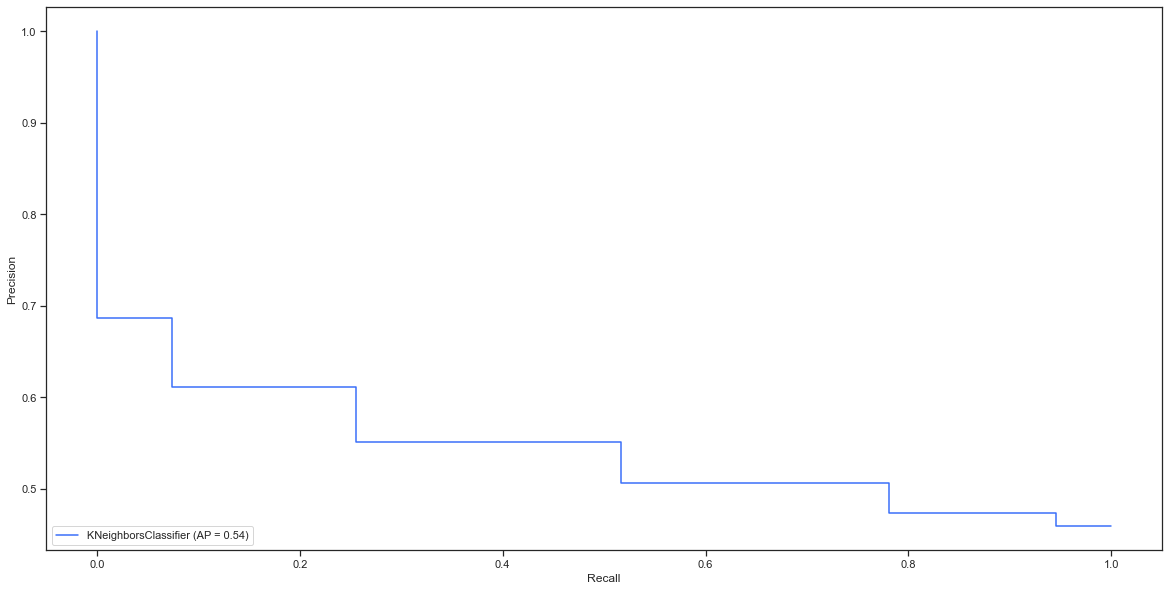

--------DecisionTreeClassifier--------
The accuracy of model DecisionTreeClassifier is 0.56
              precision    recall  f1-score   support

           0       0.59      0.58      0.59     10997
           1       0.52      0.53      0.53      9357

    accuracy                           0.56     20354
   macro avg       0.56      0.56      0.56     20354
weighted avg       0.56      0.56      0.56     20354





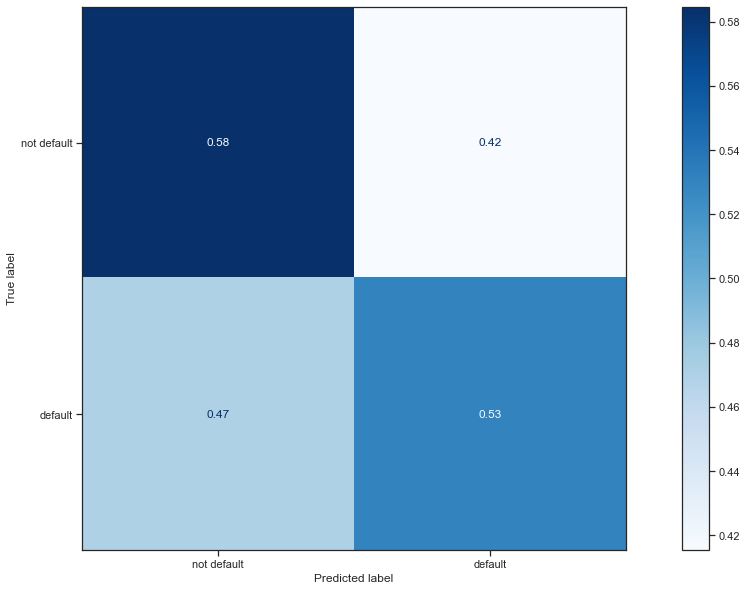

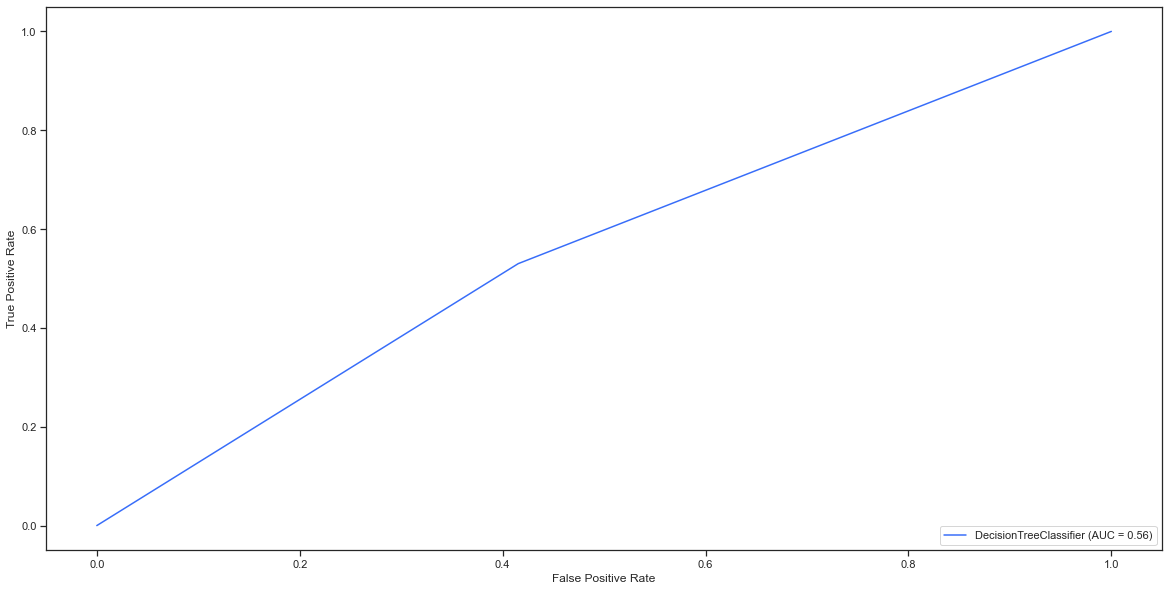

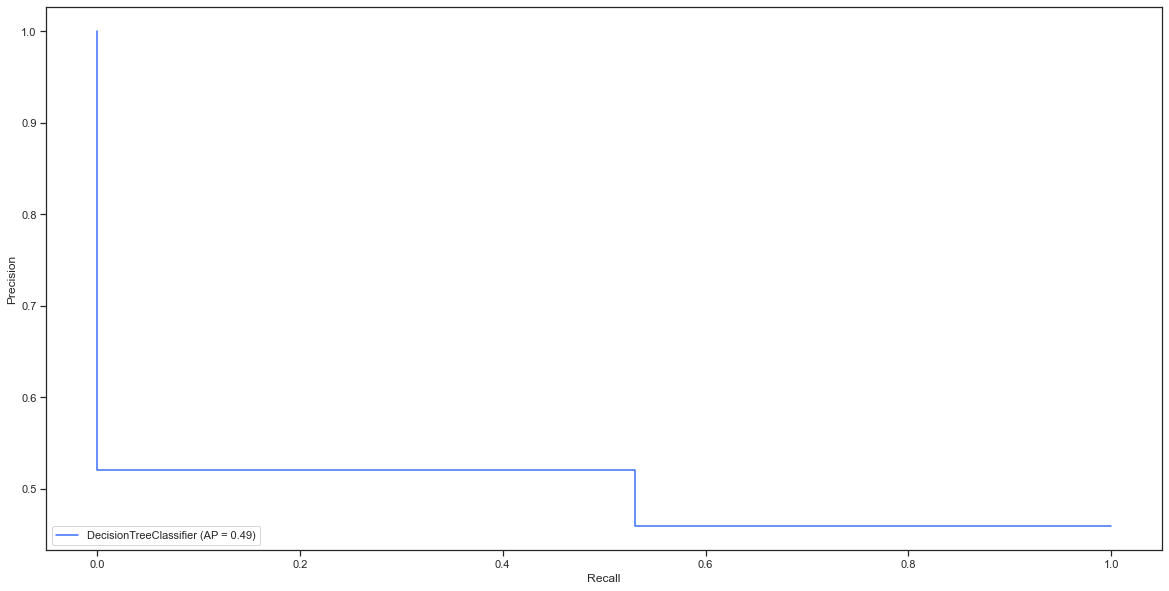

--------LGBMClassifier--------
The accuracy of model LGBMClassifier is 0.66
              precision    recall  f1-score   support

           0       0.67      0.72      0.69     10997
           1       0.64      0.58      0.61      9357

    accuracy                           0.66     20354
   macro avg       0.65      0.65      0.65     20354
weighted avg       0.65      0.66      0.65     20354





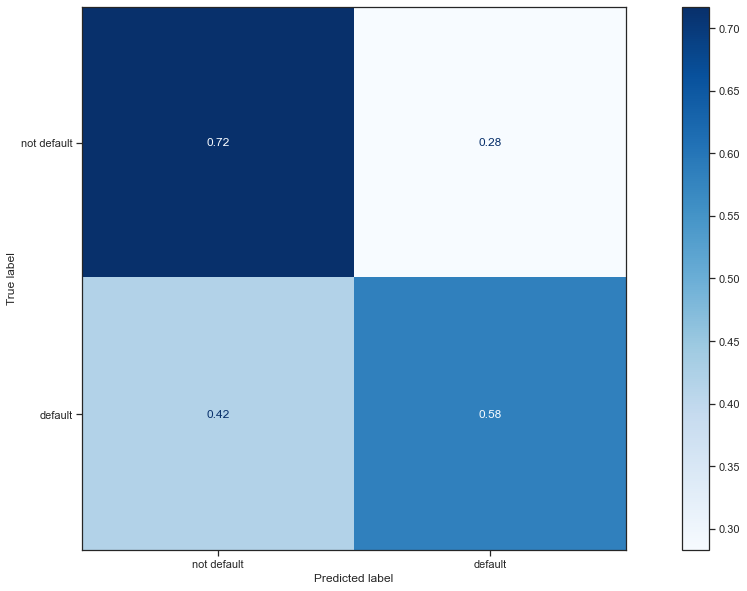

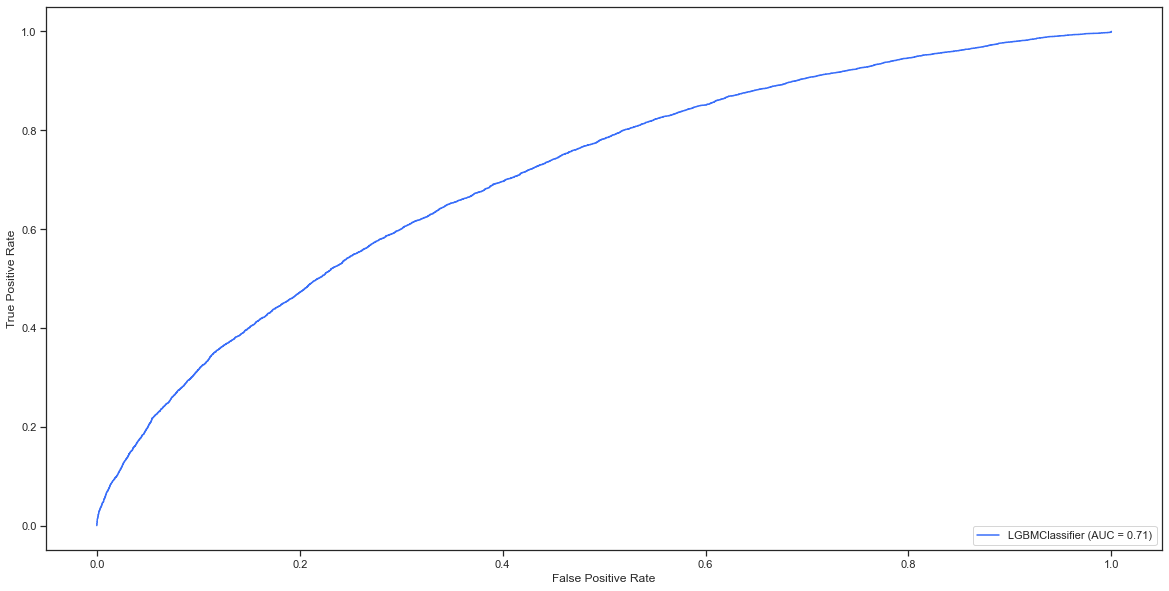

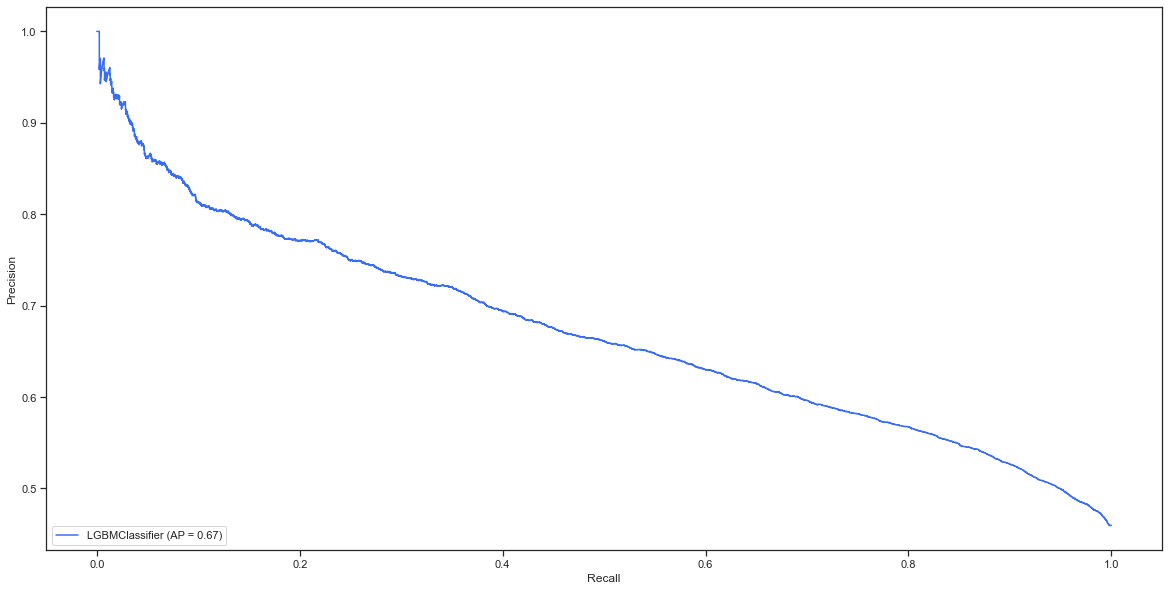

--------GradientBoostingClassifier--------
The accuracy of model GradientBoostingClassifier is 0.65
              precision    recall  f1-score   support

           0       0.67      0.72      0.69     10997
           1       0.64      0.57      0.60      9357

    accuracy                           0.65     20354
   macro avg       0.65      0.65      0.65     20354
weighted avg       0.65      0.65      0.65     20354





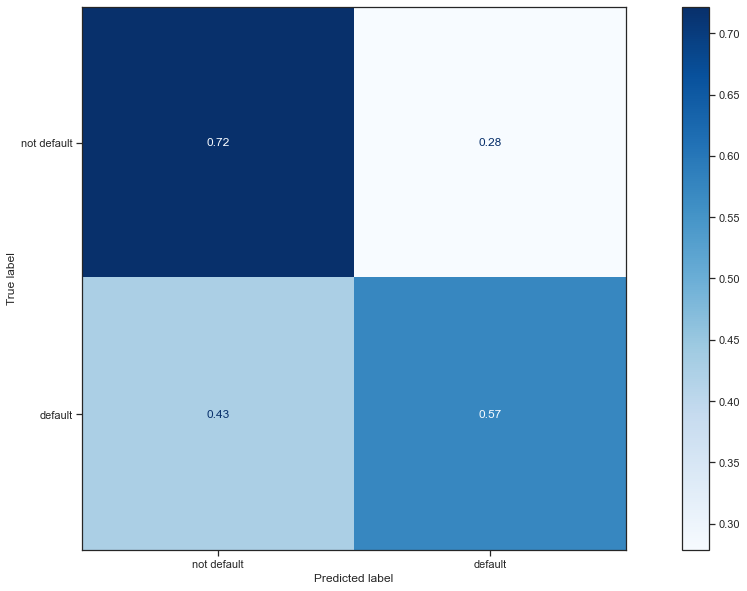

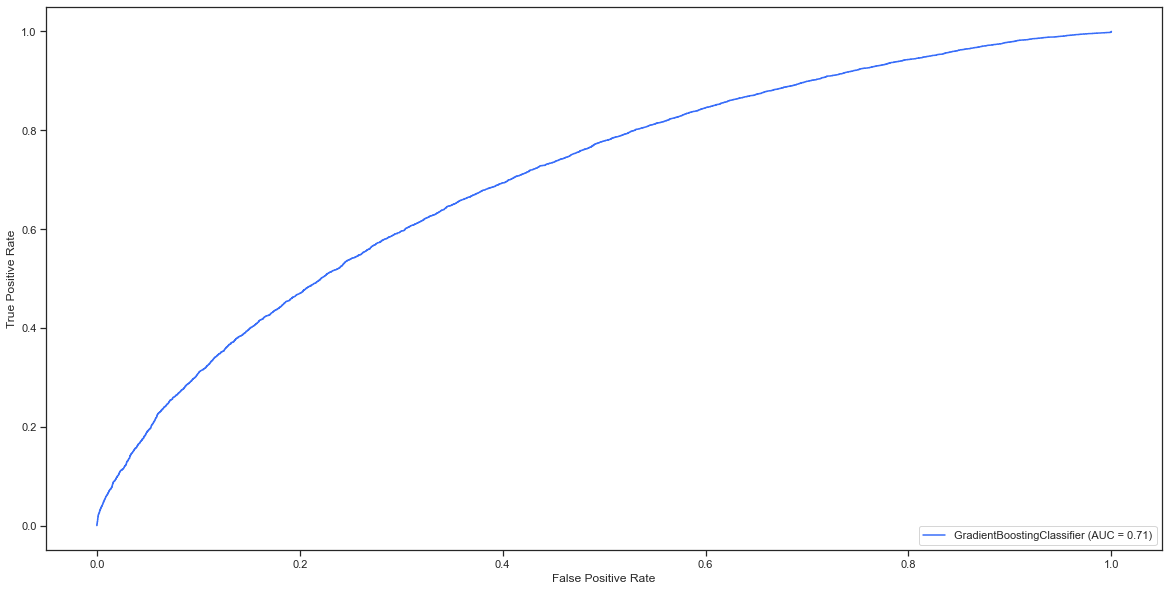

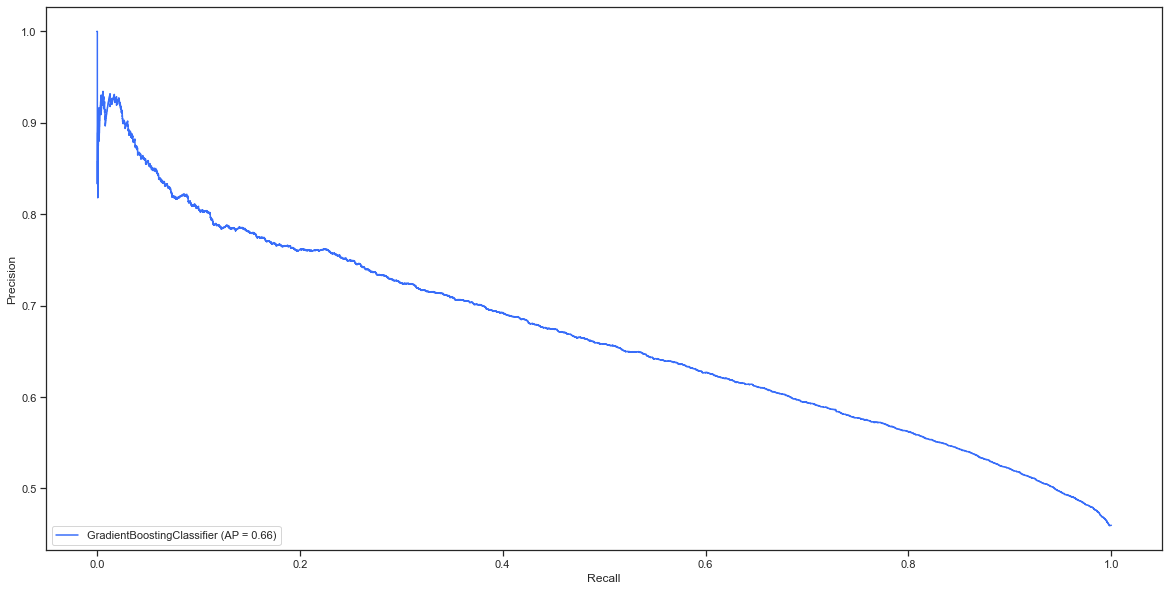

--------HistGradientBoostingClassifier--------
The accuracy of model HistGradientBoostingClassifier is 0.65
              precision    recall  f1-score   support

           0       0.67      0.71      0.69     10997
           1       0.63      0.59      0.61      9357

    accuracy                           0.65     20354
   macro avg       0.65      0.65      0.65     20354
weighted avg       0.65      0.65      0.65     20354





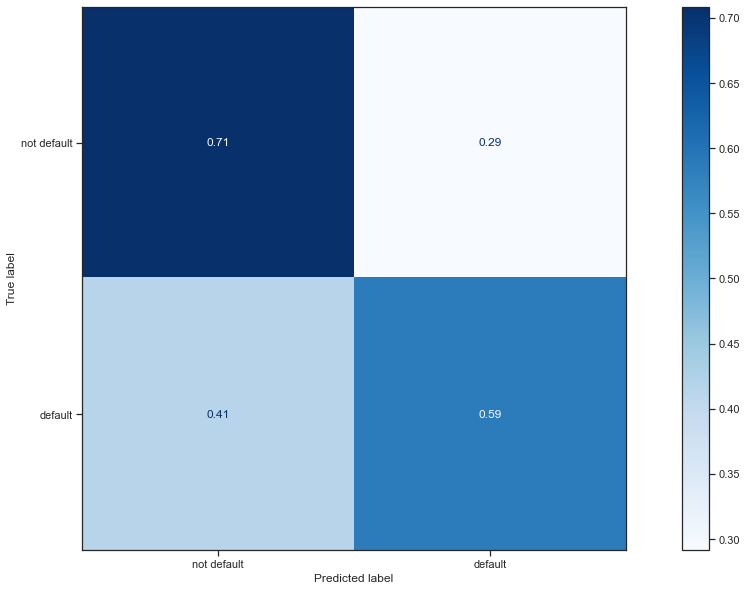

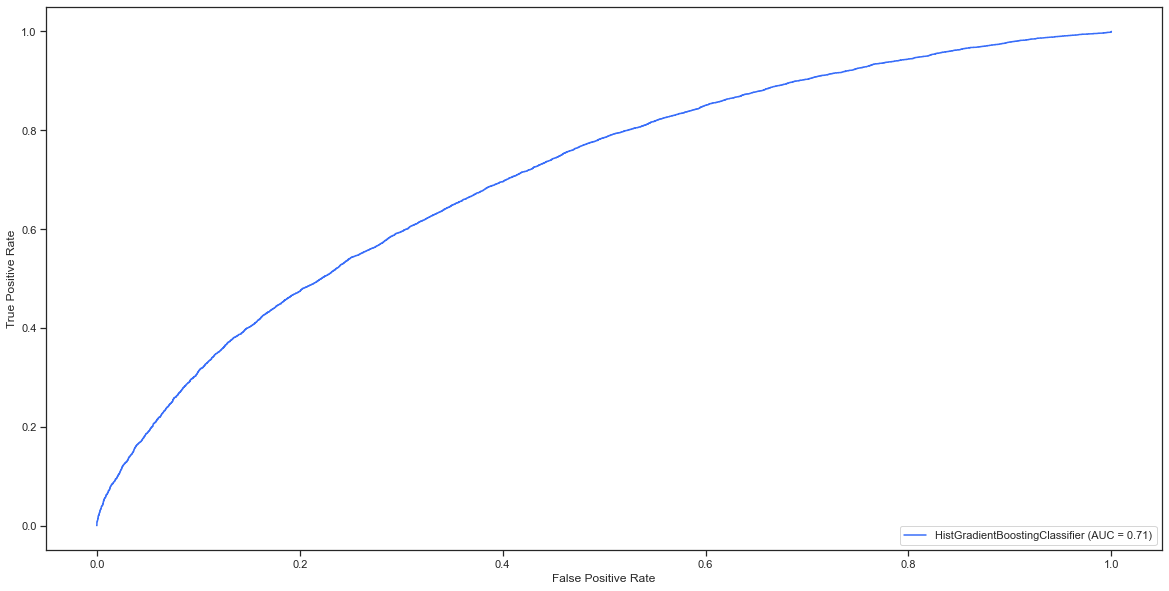

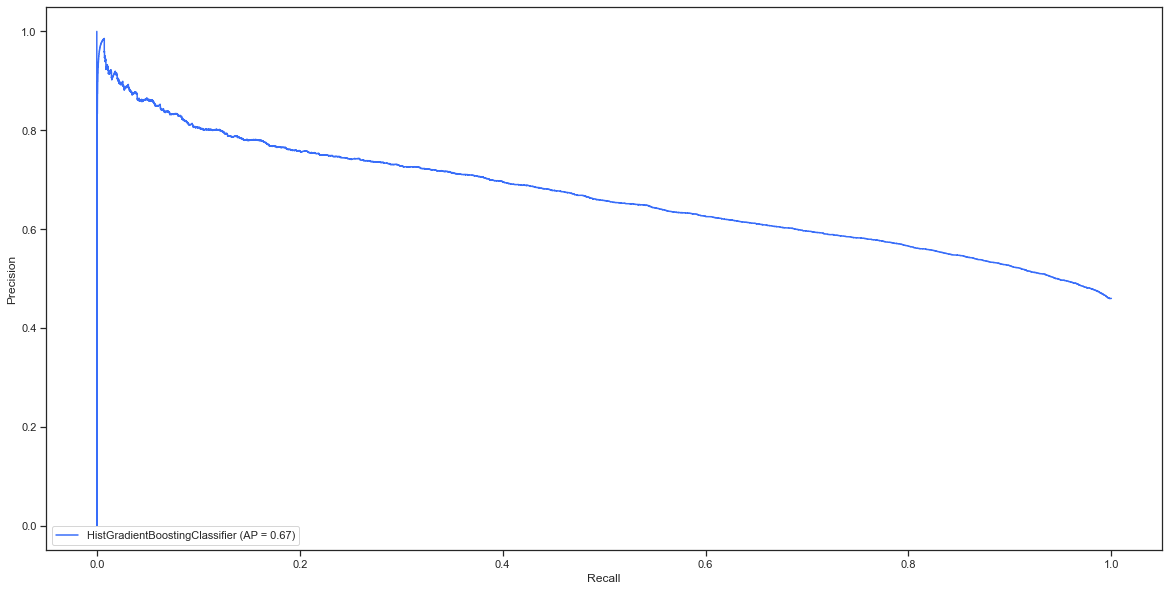

In [154]:
models= [log_clf, xgb_model1, knn1, reg_dtr1, lgbm1, gradient_boosting_clf1, hist_gradient_boosting_clf1]
performance_results = pd.DataFrame(columns=["Model_name","Accuracy","Precision","Recall", "Fscore","ROC_AUC"])
for model in models:
    model_name = type(model).__name__
    print(f"--------{model_name}--------")
    model.fit(X_train, y_train) 
    y_pred= model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    accuracy= accuracy_score(y_test, y_pred) 
    clf_report= classification_report(y_test, y_pred)
    precision, recall, fscore,_ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    performance_results = performance_results.append({"Model_name":model_name,"Accuracy":accuracy,"Precision":precision,"Recall":recall,"Fscore":fscore,"ROC_AUC":roc_auc},ignore_index=True)
    print(f"The accuracy of model {model_name} is {accuracy:.2f}")
    print(clf_report)
    print("\n")
    
    plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["not default","default"],
                                 cmap=plt.cm.Blues,
                                 normalize="true")
    
    plot_roc_curve(model, X_test, y_test)
    plot_precision_recall_curve(model, X_test,y_test)
    plt.show()

In [155]:
performance_results

Model_name  Accuracy  Precision    Recall    Fscore  \
0              LogisticRegression  0.632062   0.634234  0.471626  0.540975   
1                   XGBClassifier  0.645622   0.623816  0.577215  0.599611   
2            KNeighborsClassifier  0.584062   0.550711  0.517046  0.533348   
3          DecisionTreeClassifier  0.559546   0.520571  0.530084  0.525285   
4                  LGBMClassifier  0.655154   0.636565  0.582345  0.608249   
5      GradientBoostingClassifier  0.653336   0.636655  0.572833  0.603060   
6  HistGradientBoostingClassifier  0.652255   0.631173  0.585978  0.607737   

    ROC_AUC  
0  0.673508  
1  0.700201  
2  0.607096  
3  0.557349  
4  0.709796  
5  0.705430  
6  0.707947